<a href="https://colab.research.google.com/github/diegoavelez/Estadistica-Aplicada---Evaluando-Estrategias-COVID-19/blob/main/Diego_Velez_proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

## ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la curva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 ## Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función de las categorías "la población hizo cuarentena" y "la población no hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.





##¡Comencemos! (Ejemplo)

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive

# Gráficos
# ==============================================================================
import pylab as plt
from matplotlib import style
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Preprocesado y modelado
# =============================================================================
from scipy.optimize import curve_fit
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

seed = 88

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Cargamos los datos
# =============================================================================
drive.mount('/content/drive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
# =============================================================================
root_dir = "/content/drive/MyDrive/DS Datasets"


Mounted at /content/drive


In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/DS Datasets/covid-tests-cases-deaths-per-million.csv')
datos

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN
...,...,...,...,...,...,...,...
133666,Zimbabwe,ZWE,2020-05-26,NaN,NaN,3.711,0.265
133667,Zimbabwe,ZWE,2020-09-05,NaN,NaN,453.016,13.649
133668,Zimbabwe,ZWE,2021-12-10,NaN,NaN,10324.360,312.944
133669,Zimbabwe,ZWE,2021-12-11,NaN,NaN,10932.953,313.739


In [ ]:
paises=datos['Entity'] #cargo el vector de paises
confirmados=datos['Total confirmed cases of COVID-19 per million people'] #carga vector todos los casos confirmados por millón

Text(0, 0.5, 'cantidad de casos')

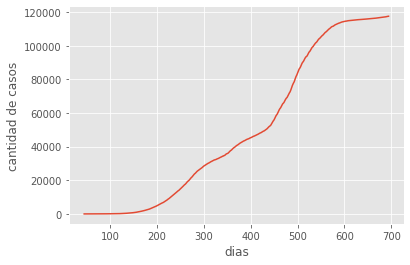

In [ ]:
# Seleccionamos Argentina
# =============================================================================
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))

plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

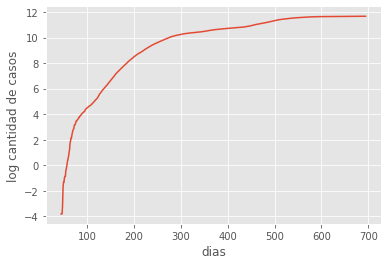

In [ ]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 70 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

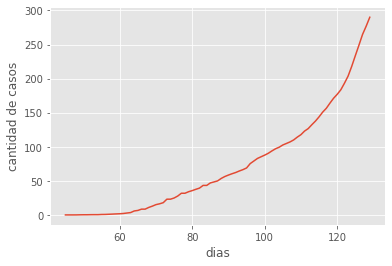

In [ ]:
casos_principio=casos_arg[45:130]
dias_principio=dias[45:130]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

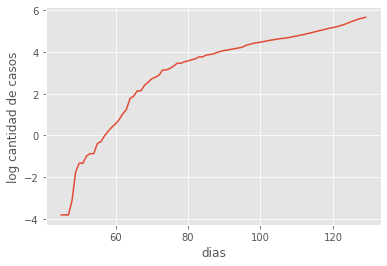

In [ ]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 70 y 130, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

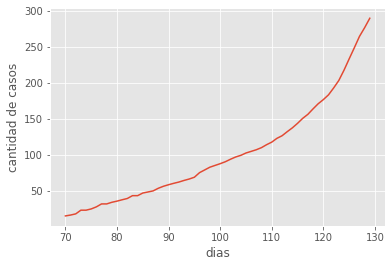

In [ ]:
casos_principio=casos_arg[70:130]
dias_principio=dias[70:130]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

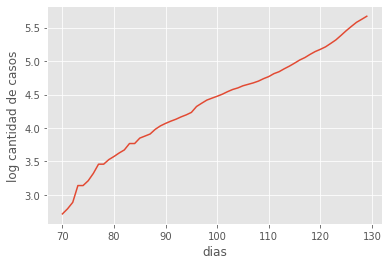

In [ ]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [ ]:
# Definimos función para ajustar modelo
# =============================================================================
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [ ]:
# Ajustamos
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.04210112, -4.29787921])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

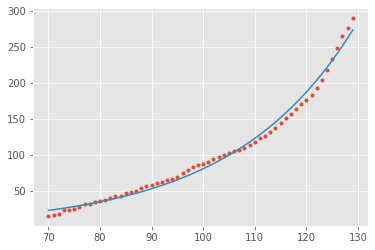

In [ ]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [ ]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

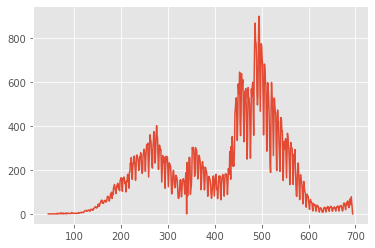

In [ ]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

## Exploración de datos y medición de K

###Exploración de la fuente de datos

El dataset completo de COVID-19 es una recopilación de los datos sobre la pandemia mantenidos por [Our World In Data](https://ourworldindata.org). Este portal actualiza los datos diaramente durante la pandemia del COVID-19 con cierta periodicidad.

Los datos que se pueden encontrar y fuentes de datos son:

**Casos confirmados y muertes:** estos datos proceden del Repositorio de Datos COVID-19 del Centro de Ciencia e Ingeniería de Sistemas (CSSE) de la Universidad Johns Hopkins (JHU). El conjunto de datos de casos y muertes se actualiza diariamente.

**Hospitalizaciones y admisiones en unidades de cuidados intensivos (UCI):** estos datos proceden de fuentes oficiales y son cotejados por Our World in Data.

**Pruebas de COVID-19:** estos datos son recogidos por el equipo de Our World in Data a partir de informes oficiales; se puede encontrar más detalles en la página web sobre las pruebas de COVID-19, incluyendo su lista de preguntas para entender los datos de las pruebas, información sobre la cobertura geográfica y temporal, e información detallada de las fuentes por país. El conjunto de datos de las pruebas se actualiza aproximadamente dos veces por semana.

**Vacunación contra COVID-19:** estos datos los recoge el equipo de Our World in Data a partir de informes oficiales.

**Otras variables:** estos datos se recogen de diversas fuentes (Naciones Unidas, Banco Mundial, Global Burden of Disease, Blavatnik School of Government, etc.).

*Información de las columnas*

- Extraído de este [link](https://github.com/owid/covid-19-data/tree/master/public/data)

**Entity:** para el caso de nuestro análisis el país.

**Code:** código del país.

**Day:** día de la medición.

**total_tests_per_thousand:** total de pruebas realizadas de COVID-19 por cada mil personas.

**142605-annotations:** comentarios u observaciones asociados a la medición.

**Total confirmed cases of COVID-19 per million people:** Total de casos confirmados de COVID-19 por millón de personas. El conteo puede incluir casos probables, cuando son reportados.

**Total confirmed deaths due to COVID-19 per million people:** Total de muertes atribuídas al COVID-19 por millón de personas. El conteo puede incluir muertes probables, cuando son reportados.



###Análisis exploratorio de datos

Se seleccionarán diez países del norte (EEUU, Reino Unido, Italia, Israel, Corea del Sur, Alemania, Francia, España, Japón, Rusia) para medir su primer crecimiento exponencial de la curva de contagio, extrayendo su *k* de crecimiento exponencial y comparando el modelo con diferentes países.

In [ ]:
# Convertimos la columna Day en un objeto datetime para los análisis que 
# requieran fechas específicas
# =============================================================================
datos['Day'] = pd.to_datetime(datos['Day'], format="%Y/%m/%d")

# Confirmamos la información de la columna
# =============================================================================
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133671 entries, 0 to 133670
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   Entity                                                     133671 non-null  object        
 1   Code                                                       123937 non-null  object        
 2   Day                                                        133671 non-null  datetime64[ns]
 3   total_tests_per_thousand                                   60102 non-null   float64       
 4   142605-annotations                                         58312 non-null   object        
 5   Total confirmed cases of COVID-19 per million people       131843 non-null  float64       
 6   Total confirmed deaths due to COVID-19 per million people  120480 non-null  float64       
dtypes: datetime64[ns](1),

In [ ]:
# Creamos un dataset para los resultados y posteriores indicadores
# =============================================================================
resultados = pd.DataFrame()
resultados['Paises'] = ['United States','United Kingdom','Italy','Israel',
                        'South Korea','Germany','France','Spain','Japan',
                        'Russia','World excl. China']

# Guardamos el dato de la población y su partipación (%) a nivel mundial 
# excluyendo China
# =============================================================================
resultados['Poblacion (millones)'] = [331.00,67.89,60.46,8.65,51.27,83.78,65.27,
                                      46.75,126.48,145.93,6464.70]

resultados['% World excl. China'] = [5.15,1.05,0.93,0.13,0.79,1.28,1.00,0.72,
                                     1.93,2.24,81.79]

# Iniciamos las listas que usaremos más adelante
k_values = []
dia_inicial = []
dia_final = []
dif_dias = []
mortalidad = []
porc_poblacion = []

print(resultados)

               Paises  Poblacion (millones)  % World excl. China
0       United States                331.00                 5.15
1      United Kingdom                 67.89                 1.05
2               Italy                 60.46                 0.93
3              Israel                  8.65                 0.13
4         South Korea                 51.27                 0.79
5             Germany                 83.78                 1.28
6              France                 65.27                 1.00
7               Spain                 46.75                 0.72
8               Japan                126.48                 1.93
9              Russia                145.93                 2.24
10  World excl. China               6464.70                81.79


*La información de la población y su cálculo fue hecho a partir de los datos recopilados en este portal [worldpopulationreview](https://worldpopulationreview.com) para el año 2020.

####Estados Unidos

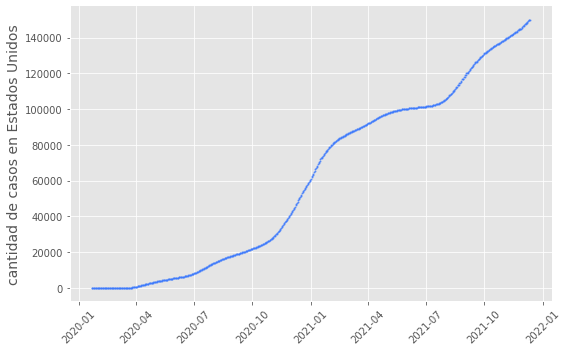

In [ ]:
# Seleccionamos Estados Unidos
# =============================================================================
datos_USA = datos[datos['Entity'] == 'United States'].sort_values('Day', ascending=True)
casos_USA = datos_USA.iloc[:,5]
dias_USA = np.arange(0,len(casos_USA))
fechas_USA = datos_USA.iloc[:,2]
mortalidad_USA = datos_USA.iloc[:,6]

plt.plot_date(fechas_USA,casos_USA, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Estados Unidos', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


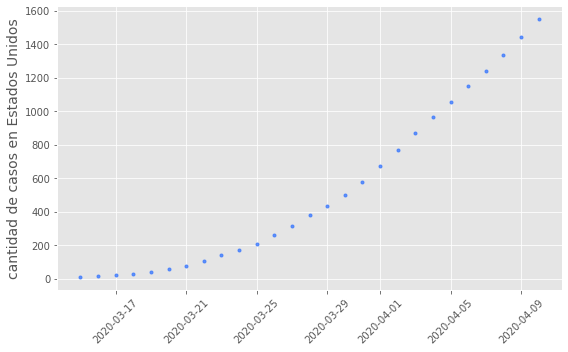

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_USA_pico = fechas_USA[53:80]
casos_USA_pico = casos_USA[53:80]
dias_USA_pico = dias_USA[53:80]

plt.plot_date(fechas_USA_pico,casos_USA_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Estados Unidos', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso de Estados Unidos, el primer pico llega aproximadamente en el día 80, se realiza el gráfico entre el día 53 y 80 para efectos del ejercicio de hallar el k de crecimiento exponencial, teniendo en cuenta el crecimiento sostenido.

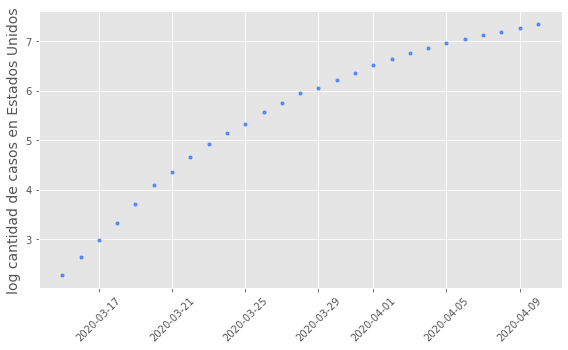

In [ ]:
# Graficamos de nuevo aplicando logaritmo
# =============================================================================
plt.plot_date(fechas_USA_pico,np.log(casos_USA_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Estados Unidos', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_USA_pico, casos_USA_pico)
popt

array([ 0.11497052, 14.31733763])

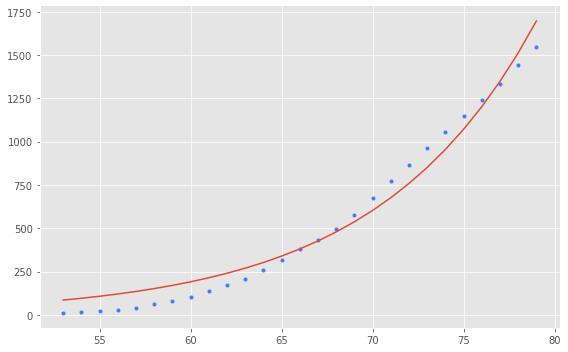

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_USA_pico,k,t0)
plt.plot(dias_USA_pico,casos_USA_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_USA_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

La función ajusta muy bien a los datos reales del dataset, obteniendo un k para Estados Unidos de 0.11497052

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_USA_pico.iloc[0])
dia_final.append(fechas_USA_pico.iloc[-1])
dif_dias.append(dias_USA_pico[-1] - dias_USA_pico[0])
mortalidad.append(mortalidad_USA.iloc[80])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_USA_pico.iloc[-1]/10000)

####Reino Unido

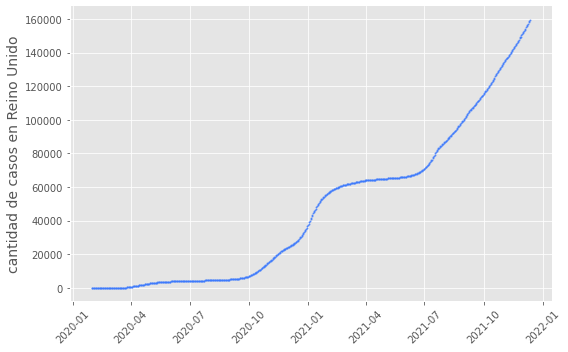

In [ ]:
# Seleccionamos Reino Unido
# =============================================================================
datos_GBR = datos[datos['Entity'] == 'United Kingdom'].sort_values('Day',ascending=True)
casos_GBR = datos_GBR.iloc[:,5]
dias_GBR = np.arange(0,len(casos_GBR))
fechas_GBR = datos_GBR.iloc[:,2]
mortalidad_GBR = datos_GBR.iloc[:,6]

plt.plot_date(fechas_GBR,casos_GBR, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Reino Unido', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

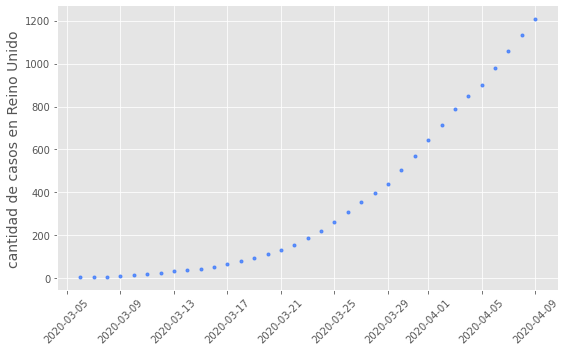

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_GBR_pico = fechas_GBR[35:70]
casos_GBR_pico = casos_GBR[35:70]
dias_GBR_pico = dias_GBR[35:70]

plt.plot_date(fechas_GBR_pico,casos_GBR_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Reino Unido', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso del Reino Unido el intervalo de evaluación de *k* lo tomaremos desde el día 35 al día 70 por su crecimiento sostenido que se observa en la gráfica.

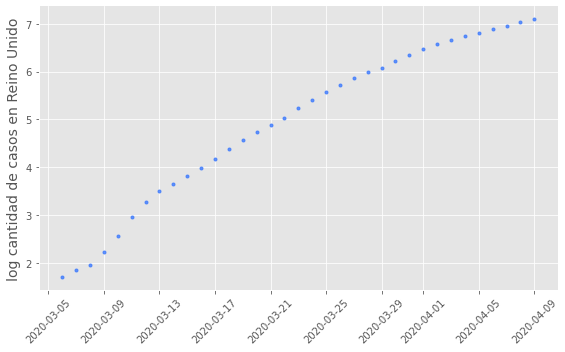

In [ ]:
# Graficamos de nuevo aplicando logaritmo
# =============================================================================
plt.plot_date(fechas_GBR_pico,np.log(casos_GBR_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Reino Unido', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_GBR_pico, casos_GBR_pico)
popt

array([0.10488111, 0.49608679])

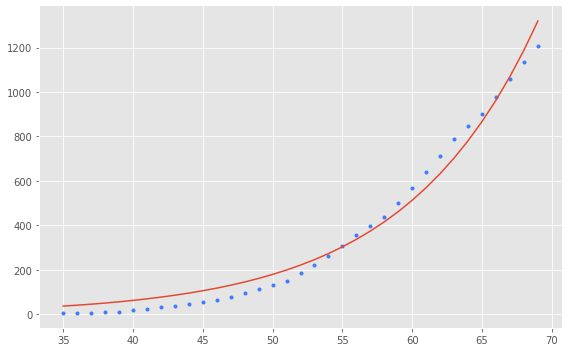

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_GBR_pico,k,t0)
plt.plot(dias_GBR_pico,casos_GBR_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_GBR_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

La función ajusta muy bien a los datos reales del dataset, incluso de manera muy similar a lo que se vio en el análisis de Estados Unidos, obteniendo un k igual a 0.10488111.

In [ ]:
k_values.append(k)
dia_inicial.append(fechas_GBR_pico.iloc[0])
dia_final.append(fechas_GBR_pico.iloc[-1])
dif_dias.append(dias_GBR_pico[-1] - dias_GBR_pico[0])
mortalidad.append(mortalidad_GBR.iloc[70])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_GBR_pico.iloc[-1]/10000)

####Italia

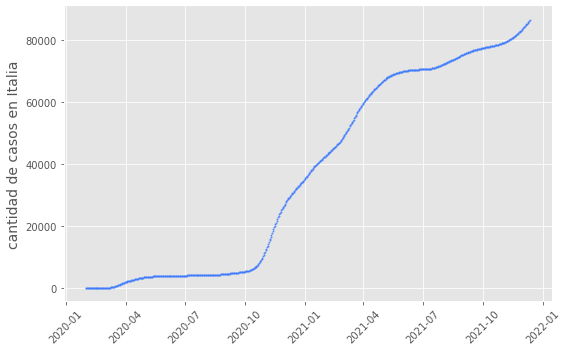

In [ ]:
# Seleccionamos Italia
# =============================================================================
datos_ITA = datos[datos['Entity'] == 'Italy'].sort_values('Day',ascending=True)
casos_ITA = datos_ITA.iloc[:,5]
dias_ITA = np.arange(0,len(casos_ITA))
fechas_ITA = datos_ITA.iloc[:,2]
mortalidad_ITA = datos_ITA.iloc[:,6]

plt.plot_date(fechas_ITA,casos_ITA, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Italia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

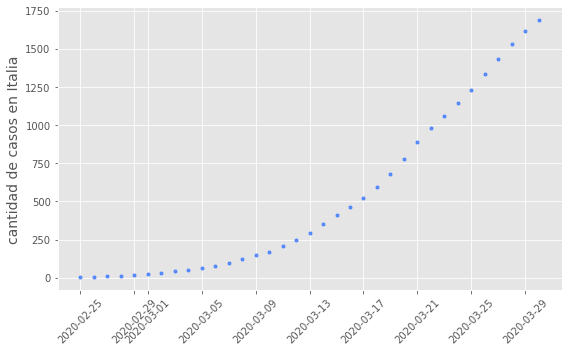

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_ITA_pico = fechas_ITA[25:60]
casos_ITA_pico = casos_ITA[25:60]
dias_ITA_pico = dias_ITA[25:60]

plt.plot_date(fechas_ITA_pico,casos_ITA_pico, alpha=0.8, markersize=3, c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Italia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso de Italia el intervalo de evaluación de *k* lo tomaremos desde el día 25 al día 60 por su crecimiento sostenido que se observa en la gráfica.

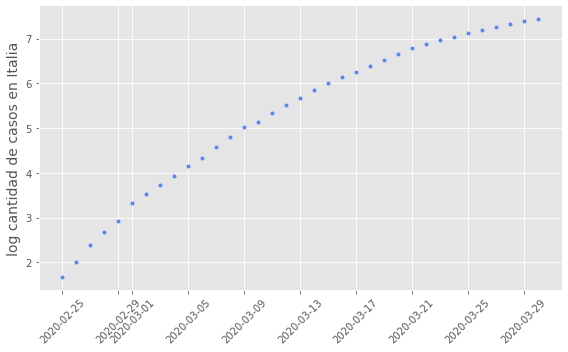

In [ ]:
# Graficamos de nuevo aplicando logaritmo
# =============================================================================
plt.plot_date(fechas_ITA_pico,np.log(casos_ITA_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Italia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_ITA_pico, casos_ITA_pico)
popt

array([  0.10063393, -15.96883957])

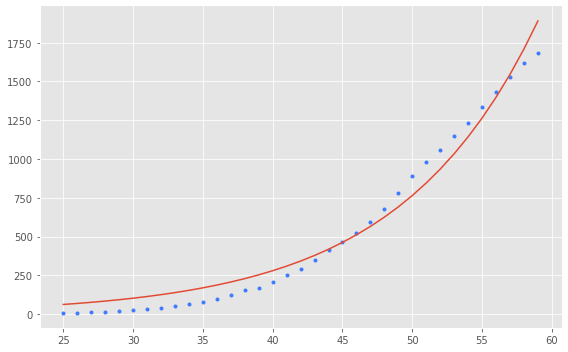

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_ITA_pico,k,t0)
plt.plot(dias_ITA_pico,casos_ITA_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_ITA_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Encontramos un ajuste similar a los ejercicios anteriores. Para el caso de Italia el valor de *k* para este primer pico es de 0.10063393.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_ITA_pico.iloc[0])
dia_final.append(fechas_ITA_pico.iloc[-1])
dif_dias.append(dias_ITA_pico[-1] - dias_ITA_pico[0])
mortalidad.append(mortalidad_ITA.iloc[60])

# convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_ITA_pico.iloc[-1]/10000)

####Israel

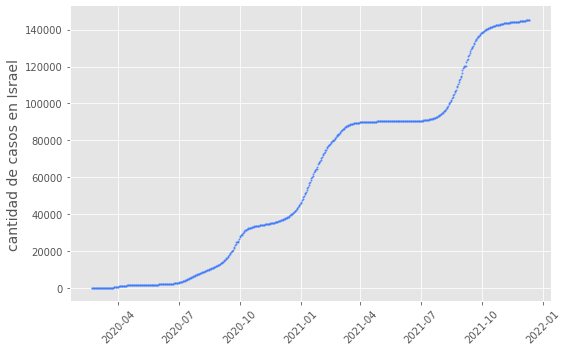

In [ ]:
# Seleccionamos Israel
# =============================================================================
datos_ISR = datos[datos['Entity'] == 'Israel'].sort_values('Day',ascending=True)
casos_ISR = datos_ISR.iloc[:,5]
dias_ISR = np.arange(0,len(casos_ISR))
fechas_ISR = datos_ISR.iloc[:,2]
mortalidad_ISR = datos_ISR.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_ISR,casos_ISR, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Israel', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

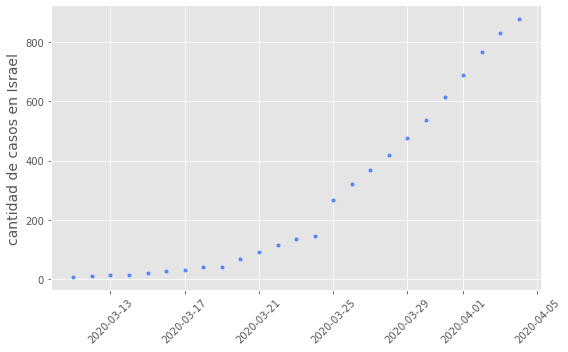

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_ISR_pico = fechas_ISR[20:45]
casos_ISR_pico = casos_ISR[20:45]
dias_ISR_pico = dias_ISR[20:45]

plt.plot_date(fechas_ISR_pico,casos_ISR_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Israel', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso de Israel el intervalo de evaluación de *k* lo tomaremos desde el día 20 al día 45 por su crecimiento sostenido que se observa en la gráfica.

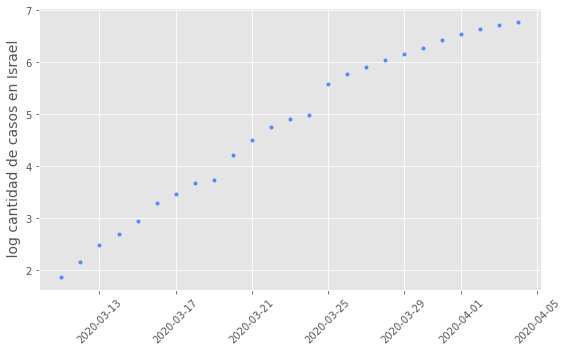

In [ ]:
# Graficamos de nuevo usando logaritmo
# =============================================================================
plt.plot_date(fechas_ISR_pico,np.log(casos_ISR_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel(' log cantidad de casos en Israel', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_ISR_pico, casos_ISR_pico)
popt

array([ 0.14127028, -4.77392026])

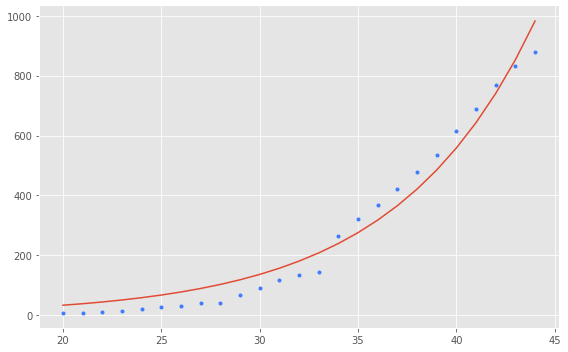

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_ISR_pico,k,t0)
plt.plot(dias_ISR_pico,casos_ISR_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_ISR_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste con nuestra función y el valor resultante de *k* es 0.14127028.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_ISR_pico.iloc[0])
dia_final.append(fechas_ISR_pico.iloc[-1])
dif_dias.append(dias_ISR_pico[-1] - dias_ISR_pico[0])
mortalidad.append(mortalidad_ISR.iloc[45])

# convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_ISR_pico.iloc[-1]/10000)

####Corea del Sur

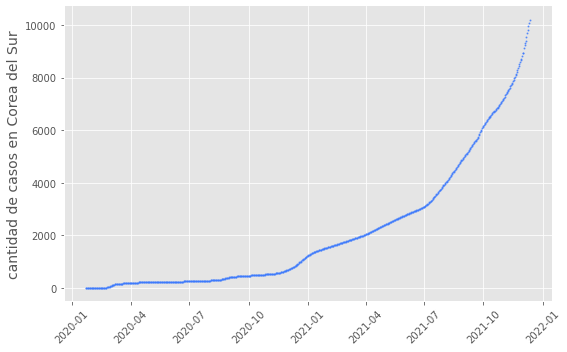

In [ ]:
# Seleccionamos Corea del Sur
# =============================================================================
datos_KOR = datos[datos['Entity'] == 'South Korea'].sort_values('Day',
                                                                ascending=True)
casos_KOR = datos_KOR.iloc[:,5]
dias_KOR = np.arange(0,len(casos_KOR))
fechas_KOR = datos_KOR.iloc[:,2]
mortalidad_KOR = datos_KOR.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_KOR,casos_KOR, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Corea del Sur', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

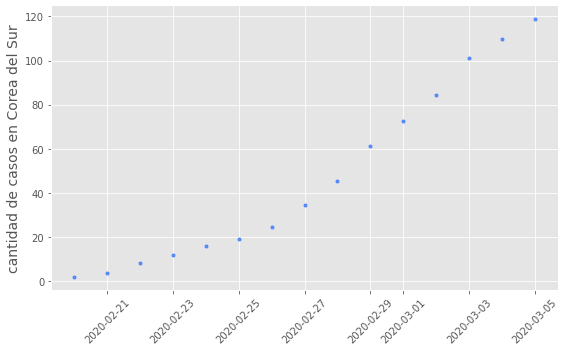

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_KOR_pico = fechas_KOR[30:45]
casos_KOR_pico = casos_KOR[30:45]
dias_KOR_pico = dias_KOR[30:45]

plt.plot_date(fechas_KOR_pico,casos_KOR_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Corea del Sur', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso de Corea del Sur el intervalo de evaluación de *k* lo tomaremos desde el día 30 al día 45 por su crecimiento sostenido que se observa en la gráfica.

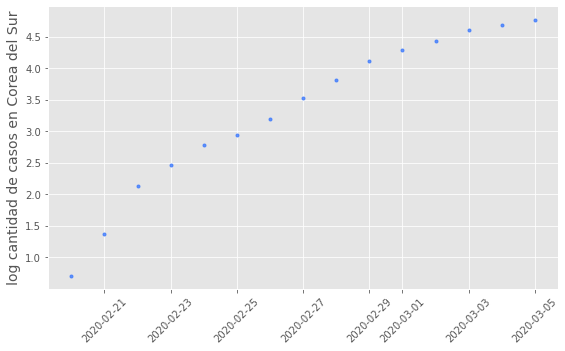

In [ ]:
# Graficamos de nuevo usando logaritmo
# =============================================================================
plt.plot_date(fechas_KOR_pico,np.log(casos_KOR_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Corea del Sur', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_KOR_pico, casos_KOR_pico)
popt

array([ 0.18398461, 17.4584644 ])

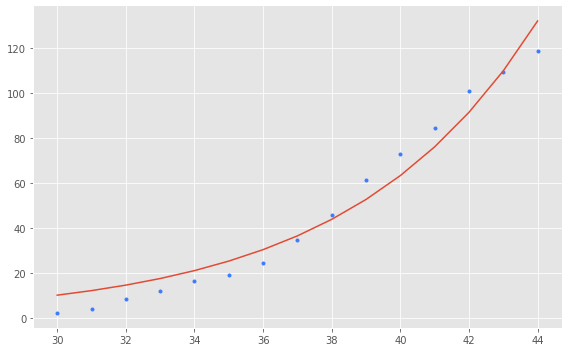

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_KOR_pico,k,t0)
plt.plot(dias_KOR_pico,casos_KOR_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_KOR_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste con nuestra función y el valor resultante de k para Corea del Sur es 0.18398461, aunque los días tomados son pocos comparados con otros países.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_KOR_pico.iloc[0])
dia_final.append(fechas_KOR_pico.iloc[-1])
dif_dias.append(dias_KOR_pico[-1] - dias_KOR_pico[0])
mortalidad.append(mortalidad_KOR.iloc[45])

# convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_KOR_pico.iloc[-1]/10000)

####Alemania

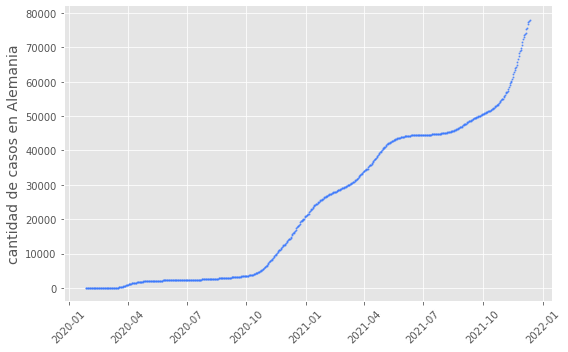

In [ ]:
# Seleccionamos Alemania
# =============================================================================
datos_DEU = datos[datos['Entity'] == 'Germany'].sort_values('Day',ascending=True)
casos_DEU = datos_DEU.iloc[:,5]
dias_DEU = np.arange(0,len(casos_DEU))
fechas_DEU = datos_DEU.iloc[:,2]
mortalidad_DEU = datos_DEU.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_DEU,casos_DEU, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Alemania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

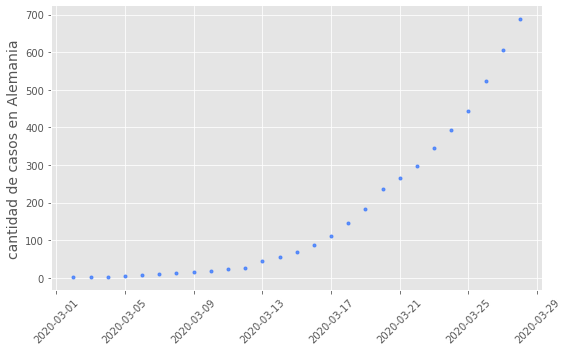

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_DEU_pico = fechas_DEU[35:62]
casos_DEU_pico = casos_DEU[35:62]
dias_DEU_pico = dias_DEU[35:62]

plt.plot_date(fechas_DEU_pico,casos_DEU_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Alemania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Alemania tomaremos el intervalo para la evaluación de *k* entre el día 35 y 62, el crecimiento sostenido hasta el primer pico.

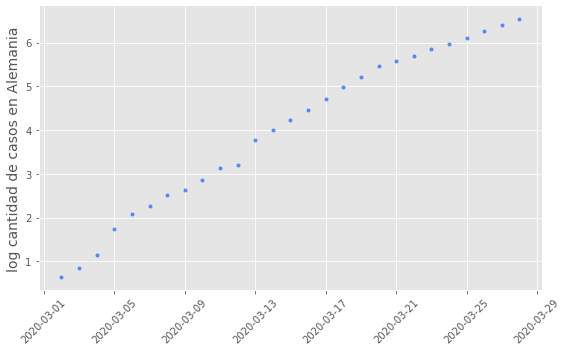

In [ ]:
# Graficamos de nuevo usando el logaritmo
# =============================================================================
plt.plot_date(fechas_DEU_pico,np.log(casos_DEU_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Alemania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_DEU_pico, casos_DEU_pico)
popt

array([ 0.15967979, 19.82827629])

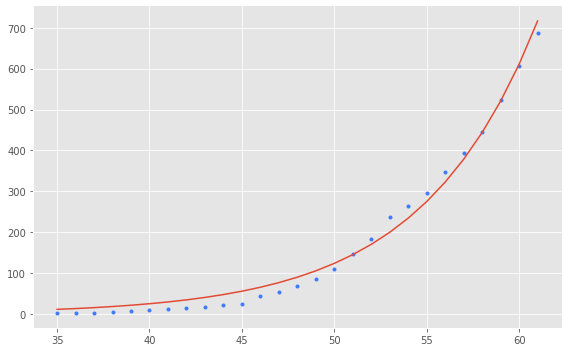

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_DEU_pico,k,t0)
plt.plot(dias_DEU_pico,casos_DEU_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_DEU_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste con nuestra función y el valor resultante de *k* para Alemania es 0.15967979

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_DEU_pico.iloc[0])
dia_final.append(fechas_DEU_pico.iloc[-1])
dif_dias.append(dias_DEU_pico[-1] - dias_DEU_pico[0])
mortalidad.append(mortalidad_DEU.iloc[62])

# convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_DEU_pico.iloc[-1]/10000)

####Francia

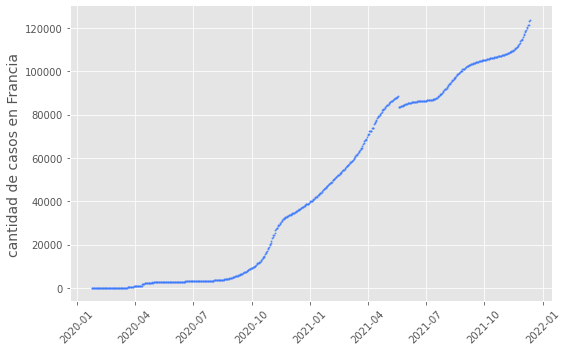

In [ ]:
# Seleccionamos Francia
# =============================================================================
datos_FRA = datos[datos['Entity'] == 'France'].sort_values('Day',ascending=True)
casos_FRA = datos_FRA.iloc[:,5]
dias_FRA = np.arange(0,len(casos_FRA))
fechas_FRA = datos_FRA.iloc[:,2]
mortalidad_FRA = datos_FRA.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_FRA,casos_FRA, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Francia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

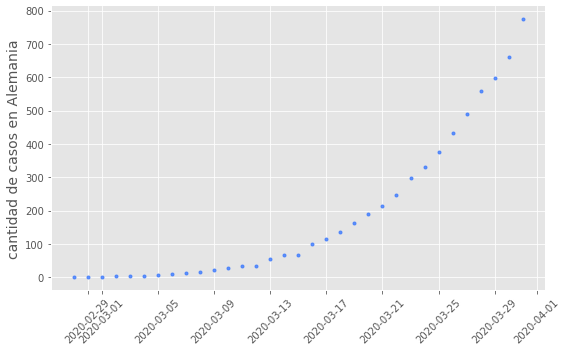

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_FRA_pico = fechas_FRA[35:68]
casos_FRA_pico = casos_FRA[35:68]
dias_FRA_pico = dias_FRA[35:68]

plt.plot_date(fechas_FRA_pico,casos_FRA_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Alemania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En Francia, para la evaluación de *k* debido al crecimiento sostenido hasta el primer pico se escogen los días 35 al 68.

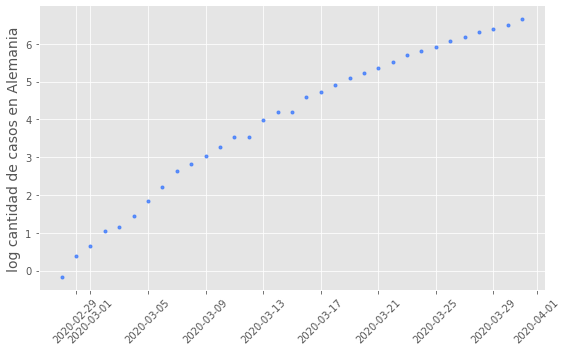

In [ ]:
# Graficamos usando el logaritmo
# =============================================================================
plt.plot_date(fechas_FRA_pico,np.log(casos_FRA_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Alemania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_FRA_pico, casos_FRA_pico)
popt

array([ 0.13399717, 17.16756415])

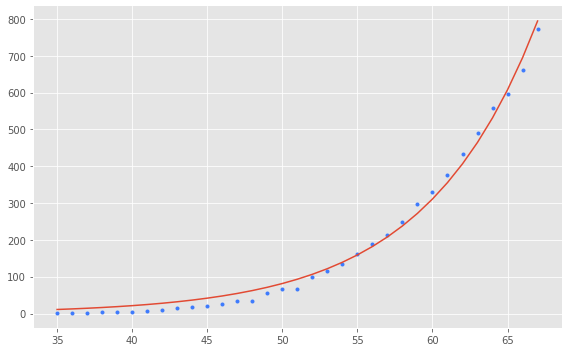

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_FRA_pico,k,t0)
plt.plot(dias_FRA_pico,casos_FRA_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_FRA_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Nuestra función obtiene un buen ajuste con el *k* = 0.13399717 encontrado para Francia.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_FRA_pico.iloc[0])
dia_final.append(fechas_FRA_pico.iloc[-1])
dif_dias.append(dias_FRA_pico[-1] - dias_FRA_pico[0])
mortalidad.append(mortalidad_FRA.iloc[68])

# convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_FRA_pico.iloc[-1]/10000)

####España

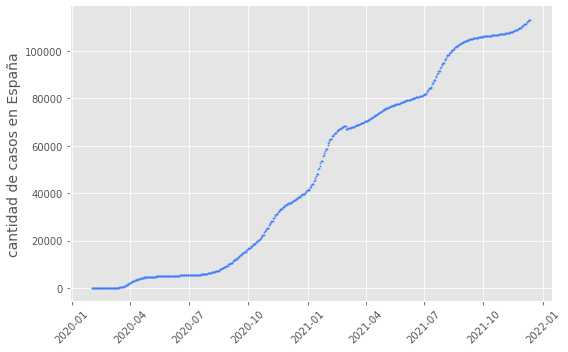

In [ ]:
# Seleccionamos España
# =============================================================================
datos_ESP = datos[datos['Entity'] == 'Spain'].sort_values('Day',ascending=True)
casos_ESP = datos_ESP.iloc[:,5]
dias_ESP = np.arange(0,len(casos_ESP))
fechas_ESP = datos_ESP.iloc[:,2]
mortalidad_ESP = datos_ESP.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_ESP,casos_ESP, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en España', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

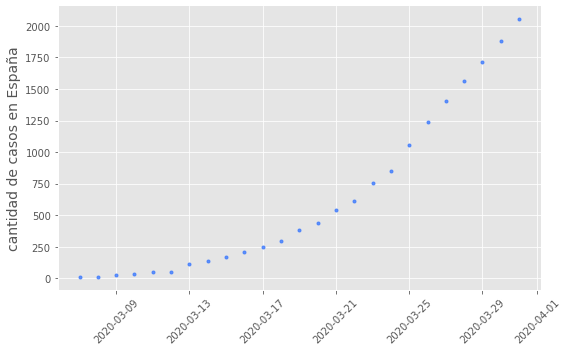

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_ESP_pico = fechas_ESP[35:60]
casos_ESP_pico = casos_ESP[35:60]
dias_ESP_pico = dias_ESP[35:60]

plt.plot_date(fechas_ESP_pico,casos_ESP_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en España', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En España, para la evaluación de *k* debido al crecimiento sostenido hasta el primer pico, se escogen los días 35 al 60.

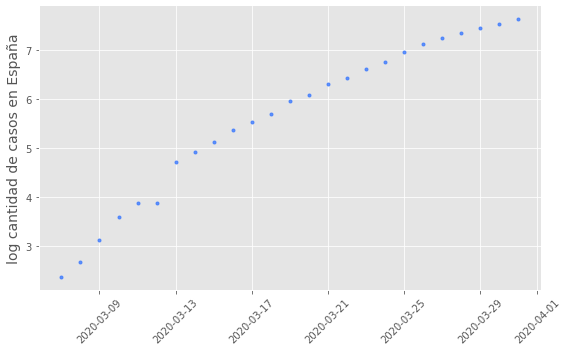

In [ ]:
# Graficamos usando el logaritmo
# =============================================================================
plt.plot_date(fechas_ESP_pico,np.log(casos_ESP_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en España', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_ESP_pico, casos_ESP_pico)
popt

array([0.14145951, 4.4961955 ])

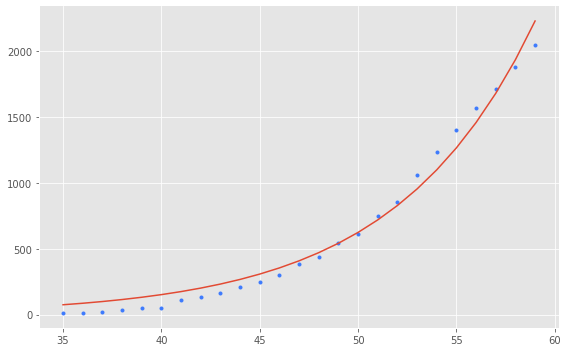

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_ESP_pico,k,t0)
plt.plot(dias_ESP_pico,casos_ESP_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_ESP_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste de la función para el caso de España con un valor *k* = 0.14145951.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_ESP_pico.iloc[0])
dia_final.append(fechas_ESP_pico.iloc[-1])
dif_dias.append(dias_ESP_pico[-1] - dias_ESP_pico[0])
mortalidad.append(mortalidad_ESP.iloc[60])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_ESP_pico.iloc[-1]/10000)

####Japón

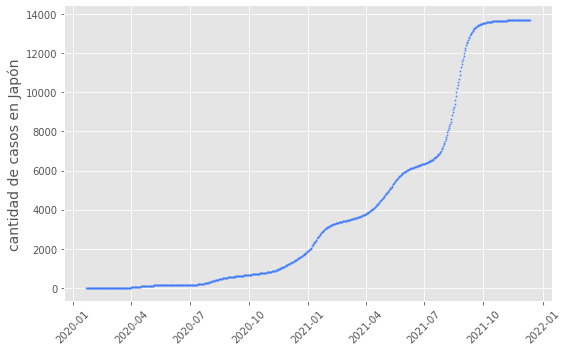

In [ ]:
# Seleccionamos Japón
# =============================================================================
datos_JPN = datos[datos['Entity'] == 'Japan'].sort_values('Day',ascending=True)
casos_JPN = datos_JPN.iloc[:,5]
dias_JPN = np.arange(0,len(casos_JPN))
fechas_JPN = datos_JPN.iloc[:,2]
mortalidad_JPN = datos_JPN.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_JPN,casos_JPN, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Japón', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

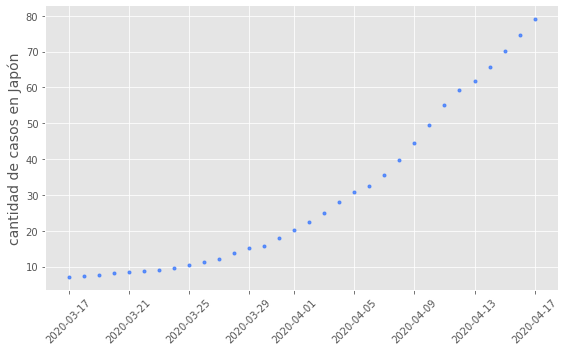

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_JPN_pico = fechas_JPN[55:87]
casos_JPN_pico = casos_JPN[55:87]
dias_JPN_pico = dias_JPN[55:87]

plt.plot_date(fechas_JPN_pico,casos_JPN_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Japón', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Japón escogemos una fecha posterior, días entre 55-87 , para lograr ver el crecimiento sostenido para evaluar *k*.

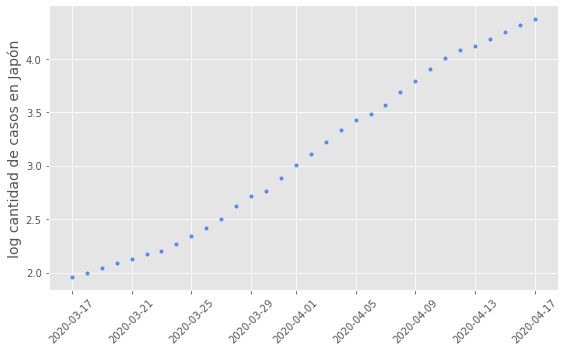

In [ ]:
# Graficamos usando logaritmo
# =============================================================================
plt.plot_date(fechas_JPN_pico,np.log(casos_JPN_pico), alpha=0.8, markersize=3, c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Japón', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_JPN_pico, casos_JPN_pico)
popt

array([ 0.08493578, 33.85586378])

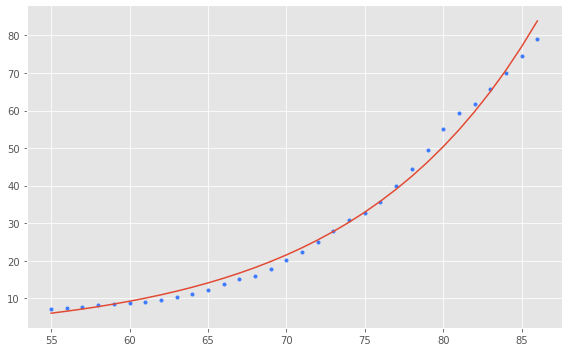

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_JPN_pico,k,t0)
plt.plot(dias_JPN_pico,casos_JPN_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_JPN_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste con la función vs los datos reales, obteniendo un valor de k = 0.08493578, en el caso de Japón.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_JPN_pico.iloc[0])
dia_final.append(fechas_JPN_pico.iloc[-1])
dif_dias.append(dias_JPN_pico[-1] - dias_JPN_pico[0])
mortalidad.append(mortalidad_JPN.iloc[87])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_JPN_pico.iloc[-1]/10000)

####Rusia

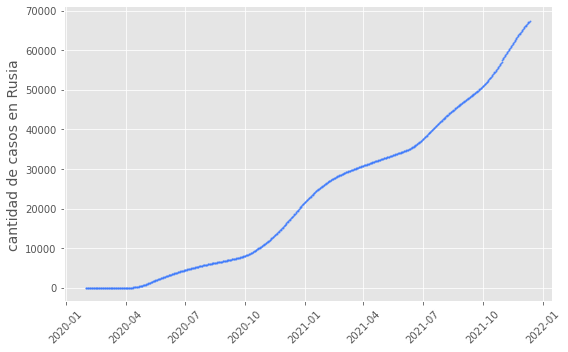

In [ ]:
# Seleccionamos Rusia
# =============================================================================
datos_RUS = datos[datos['Entity'] == 'Russia'].sort_values('Day',ascending=True)
casos_RUS = datos_RUS.iloc[:,5]
dias_RUS = np.arange(0,len(casos_RUS))
fechas_RUS = datos_RUS.iloc[:,2]
mortalidad_RUS = datos_RUS.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_RUS,casos_RUS, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Rusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

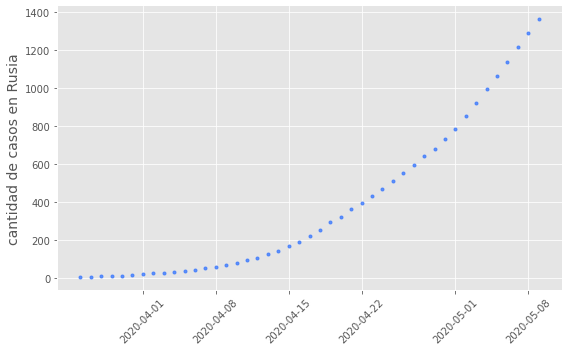

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_RUS_pico = fechas_RUS[55:100]
casos_RUS_pico = casos_RUS[55:100]
dias_RUS_pico = dias_RUS[55:100]

plt.plot_date(fechas_RUS_pico,casos_RUS_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Rusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Rusia, el intervalo de días elegido es entre el día 55 y 100 para la evaluación de *k*, teniendo en cuenta el crecimiento sostenido hasta el primer pico.

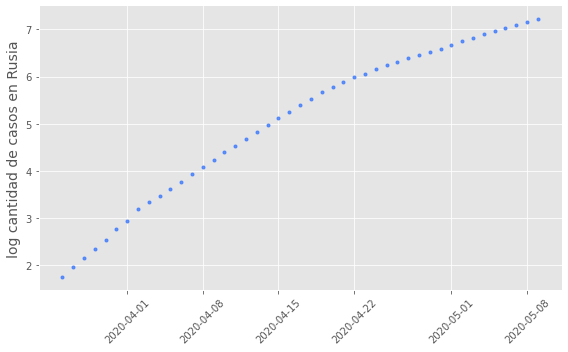

In [ ]:
# Graficamos usando logaritmo
# =============================================================================
plt.plot_date(fechas_RUS_pico,np.log(casos_RUS_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Rusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_RUS_pico, casos_RUS_pico)
popt

array([0.08180837, 9.99063091])

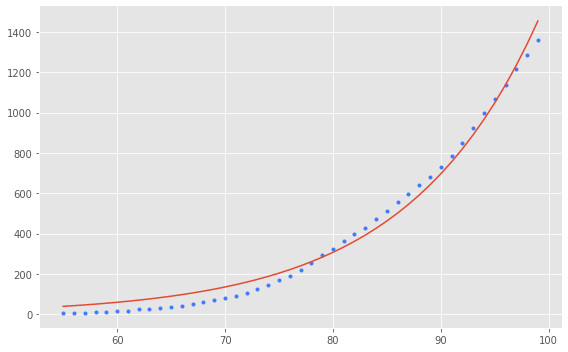

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_RUS_pico,k,t0)
plt.plot(dias_RUS_pico,casos_RUS_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_RUS_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un buen ajuste con nuestra función usando *k* = 0.08180837 vs los datos reales, para el caso de Rusia.

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_RUS_pico.iloc[0])
dia_final.append(fechas_RUS_pico.iloc[-1])
dif_dias.append(dias_RUS_pico[-1] - dias_RUS_pico[0])
mortalidad.append(mortalidad_RUS.iloc[100])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_RUS_pico.iloc[-1]/10000)

####China

Obtendremos la gráfica de cantidad de casos para China y su logaritmo para estudiar su comportamiento.

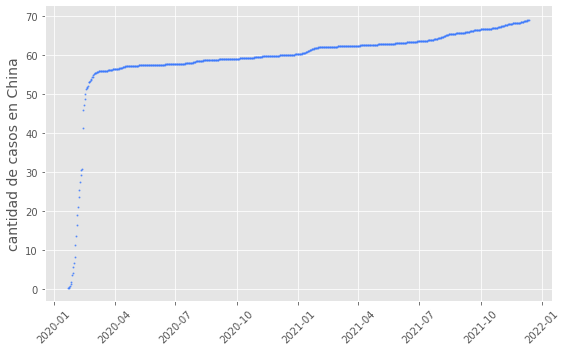

In [ ]:
# Seleccionamos China
# =============================================================================
datos_CHN = datos[datos['Entity'] == 'China'].sort_values('Day',ascending=True)
casos_CHN = datos_CHN.iloc[:,5]
dias_CHN = np.arange(0,len(casos_CHN))
fechas_CHN = datos_CHN.iloc[:,2]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_CHN,casos_CHN, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en China', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

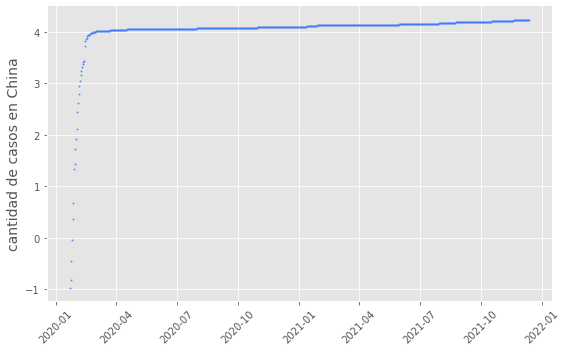

In [ ]:
# Graficamos usando logaritmo
# =============================================================================
plt.plot_date(fechas_CHN,np.log(casos_CHN), alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en China', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Por las gráficas anteriores, se puede apreciar que las mediciones tienen algunas irregularidades y pueden ser artefactos en la medición de la cantidad de contagios, se calculará el *k* global excluyendo China para tener una aproximación más precisa de la situación mundial.

####Global excluyendo China

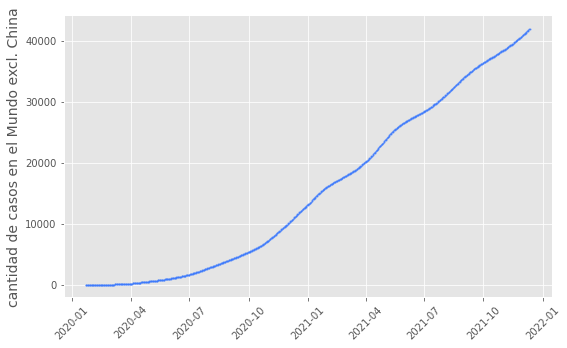

In [ ]:
# Seleccionamos los datos mundiales excluyendo China
# =============================================================================
datos_WRL = datos[datos['Entity'] == 
                  'World excl. China'].sort_values('Day',ascending=True)
casos_WRL = datos_WRL.iloc[:,5]
dias_WRL = np.arange(0,len(casos_WRL))
fechas_WRL = datos_WRL.iloc[:,2]
mortalidad_WRL = datos_WRL.iloc[:,6]

# Graficamos todas las fechas
plt.plot_date(fechas_WRL,casos_WRL, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en el Mundo excl. China', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

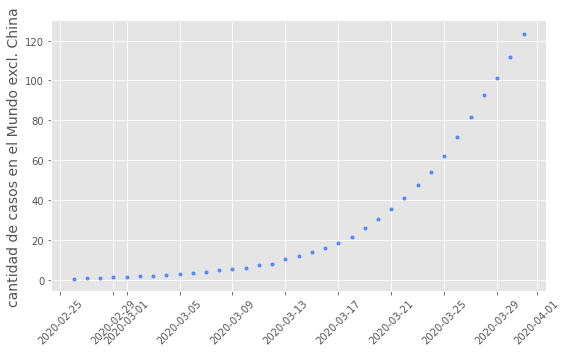

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_WRL_pico = fechas_WRL[35:70]
casos_WRL_pico = casos_WRL[35:70]
dias_WRL_pico = dias_WRL[35:70]

plt.plot_date(fechas_WRL_pico,casos_WRL_pico, alpha=0.8, markersize=3,
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en el Mundo excl. China', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso del Mundo excl. China nuestro intervalo de días está entre el 35 y el 70. Días muy similares a los que obtuvimos con los díez países del norte.

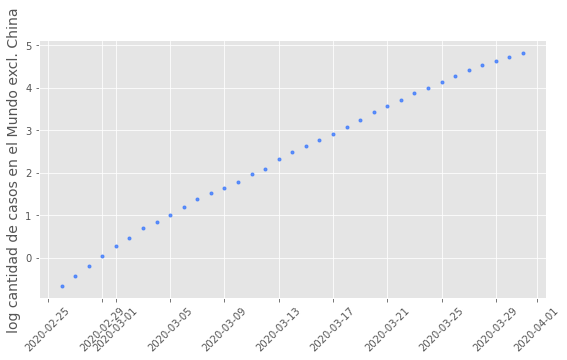

In [ ]:
# Graficamos usando logaritmo para la cantidad de casos
# =============================================================================
plt.plot_date(fechas_WRL_pico,np.log(casos_WRL_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en el Mundo excl. China', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_WRL_pico, casos_WRL_pico)
popt

array([ 0.13136361, 31.92462645])

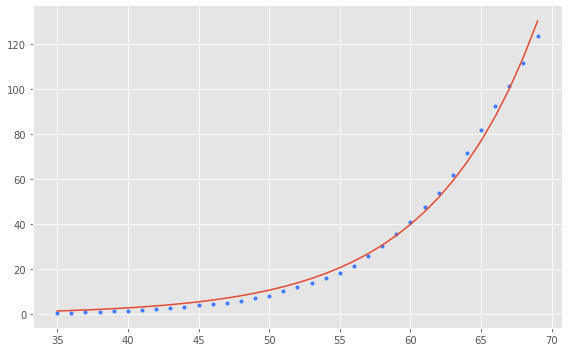

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_WRL_pico,k,t0)
plt.plot(dias_WRL_pico,casos_WRL_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_WRL_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos una función ajustada a los datos reales del Mundo excl. China obteniendo un *k* = 0.13136361

In [ ]:
# Guardamos los resultados
# =============================================================================
k_values.append(k)
dia_inicial.append(fechas_WRL_pico.iloc[0])
dia_final.append(fechas_WRL_pico.iloc[-1])
dif_dias.append(dias_WRL_pico[-1] - dias_WRL_pico[0])
mortalidad.append(mortalidad_WRL.iloc[70])

# Convertimos la cifra de casos de contagio por millón a porcentaje de la población
# =============================================================================
porc_poblacion.append(casos_WRL_pico.iloc[-1]/10000)

# Consolidamos en el dataframe
# =============================================================================
resultados['Valor k'] = k_values
resultados['Día Inicio'] = dia_inicial
resultados['Día Final'] = dia_final
resultados['Total días'] = dif_dias
resultados['Mortalidad'] = mortalidad
resultados['Porcentaje Poblacion'] = porc_poblacion

# Imprimimos resultados
# =============================================================================
resultados

,Paises,Poblacion (millones),% World excl. China,Valor k,Día Inicio,Día Final,Total días,Mortalidad,Porcentaje Poblacion
0,United States,331.00,5.15,0.114971,2020-03-15,2020-04-10,26,77.467,0.154677
1,United Kingdom,67.89,1.05,0.104881,2020-03-06,2020-04-09,34,158.766,0.120652
2,Italy,60.46,0.93,0.100634,2020-02-25,2020-03-30,34,205.872,0.168533
3,Israel,8.65,0.13,0.141270,2020-03-11,2020-04-04,24,6.027,0.087795
4,South Korea,51.27,0.79,0.183985,2020-02-20,2020-03-05,14,0.819,0.011866
5,Germany,83.78,1.28,0.159680,2020-03-02,2020-03-28,26,6.353,0.068766
6,France,65.27,1.00,0.133997,2020-02-28,2020-03-31,32,70.733,0.077380
7,Spain,46.75,0.72,0.141460,2020-03-07,2020-03-31,24,200.812,0.205204
8,Japan,126.48,1.93,0.084936,2020-03-17,2020-04-17,31,1.872,0.007900
9,Russia,145.93,2.24,0.081808,2020-03-26,2020-05-09,44,13.124,0.136161


####Intervalo de confianza

Con el objetivo de representar el valor *k* para la población mundial a partir de los paises analizados, se generará una estimación de este parámetro considerando un intervalo de confianza y valor alfa = 0.05.

Los países que fueron seleccionados para el análisis fueron seleccionados por la estabilidad en las mediciones, disponibilidad de pruebas, rigurosidad estadística, mayores recursos económicos disponibles para la medición, políticas públicas implementadas, entre otros aspectos.

Nota: no se incluye China tanto en los países seleccionados como en la medición global, porque como vimos anteriormente los datos oficiales reportados parecen estar medidos de manera incorrecta; esto puede deberse a la posición dictatorial de su Gobierno Central y sus políticas de censura en la información pública.

Para nuestro ejercicio nuestra muestra será n = 8 y grados de libertad = 7 (n-1). Como nuestra muestra es menor que 30 y se supone que son muestras independientes de una distribución normal del valor de *k*, entonces para calcular el intervalo de confianza usaremos la distribución t de Student; también excluiremos Estados Unidos y Rusia para cumplir con la condición de que la muestra tomada sea menor al 10% de la población.

In [ ]:
# Guardamos el k real del Mundo excl. China
# =============================================================================
k_global_real = resultados.iloc[10,3]

# Eliminamos Estados Unidos, Rusia y el Mundo excl. China
# =============================================================================
resultados_2 = resultados.drop(resultados.index[[0,9,10]])
resultados_2

,Paises,Poblacion (millones),% World excl. China,Valor k,Día Inicio,Día Final,Total días,Mortalidad,Porcentaje Poblacion
1,United Kingdom,67.89,1.05,0.104881,2020-03-06,2020-04-09,34,158.766,0.120652
2,Italy,60.46,0.93,0.100634,2020-02-25,2020-03-30,34,205.872,0.168533
3,Israel,8.65,0.13,0.141270,2020-03-11,2020-04-04,24,6.027,0.087795
4,South Korea,51.27,0.79,0.183985,2020-02-20,2020-03-05,14,0.819,0.011866
5,Germany,83.78,1.28,0.159680,2020-03-02,2020-03-28,26,6.353,0.068766
6,France,65.27,1.00,0.133997,2020-02-28,2020-03-31,32,70.733,0.077380
7,Spain,46.75,0.72,0.141460,2020-03-07,2020-03-31,24,200.812,0.205204
8,Japan,126.48,1.93,0.084936,2020-03-17,2020-04-17,31,1.872,0.007900


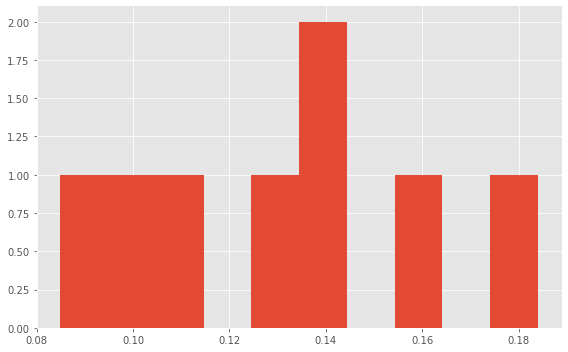

In [ ]:
# Graficamos un histograma de los valores de k para ver su distribución
# =============================================================================
plt.hist(resultados_2["Valor k"])
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Como las muestras son tan pocas es de esperarse la dispersión de los valores.

In [ ]:
 # Calculamos nuestro intervalo de confianza para el valor k
 # =============================================================================
a = 1.0 * np.array(resultados_2["Valor k"])
n = len(a)
confidence = 0.95
k_mean, k_se = np.mean(a), scipy.stats.sem(a)
k_ci = k_se * scipy.stats.t.ppf((1 + confidence) / 2, n-1)

# Imprimimos el resultado
# =============================================================================
print("Intervalo de confianza obtenido = {}".format(k_ci))
print("Media = {}".format(k_mean))
print("Intervalo de confianza superior = {}".format(k_mean+k_ci))
print("Intervalo de confianza inferior = {}".format(k_mean-k_ci))
print("Nivel de Confianza = {}".format(confidence))

Intervalo de confianza obtenido = 0.0275088806841089
Media = 0.13135527089419913
Intervalo de confianza superior = 0.15886415157830802
Intervalo de confianza inferior = 0.10384639021009023
Nivel de Confianza = 0.95


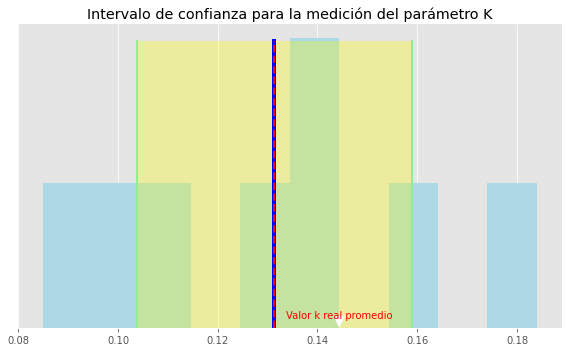

In [ ]:
# Graficamos de nuevo la distribución de los valores de k de la muestra
# =============================================================================
plt.figure(figsize=(8,5))
plt.hist(resultados_2["Valor k"], density=True, color='lightblue')

# Graficamos la media calculada y los límites del intervalo de confianza
# =============================================================================
plt.plot([k_mean,k_mean],[0, 25], 'k-', lw=4, color='blue')
plt.plot([k_mean-k_ci,k_mean-k_ci],[0, 25], 'k-', lw=2, color='lightgreen')
plt.plot([k_mean+k_ci,k_mean+k_ci],[0, 25], 'k-', lw=2, color='lightgreen')

# Graficamos una línea punteada en la medición real para comparar
# =============================================================================
plt.plot([k_global_real,k_global_real],[0, 25], '--', lw=2, color='red')
plt.annotate("Valor k real promedio", # texto
                 (k_global_real+0.013,0), # coordenadas de la etiqueta
                 textcoords="offset points", # cómo posicionar el texto
                 xytext=(0,10), # distancia del texto a los puntos (x,y)
                 color='red',
                 arrowprops=dict(color='white', linewidth=0.025), #flecha que señala la línea
                 ha ='center')  #alineamiento en el centro


# Graficamos el intervalo de confianza sombreado
# =============================================================================
plt.gca().add_patch(plt.Rectangle((k_mean-k_ci, 0),2*k_ci,25, fill=True, 
                                  linewidth=3, fc=(1,1,0,0.3)))

# Otros aspectos del gráfico
# =============================================================================
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.title("Intervalo de confianza para la medición del parámetro K")
plt.tight_layout()
plt.show()

Como se puede observar en la gráfica, la media calculada de *k* a partir de los ocho países que se tomaron como muestra (línea azul) representantan muy bien el valor *k* real de la población mundial excluyendo China (línea punteada roja) que fue calculado previamente. 

Podemos entonces concluir con base en lo anterior que nuestra estimación para encontrar el valor *k* poblacional excluyendo China funcionó muy bien y dentro del intervalo de confianza con un alfa = 0.05.

Los resultados obtenidos son los esperados por cumplir con las premisas de la distribución t de student que fueron anunciadas previamente:

1. La distribución del valor k se distribuye normalmente en la población global excluyendo China.
2. La muestra con la que se trabajo es menor a 30
3. La suma de la población de los países elegidos era menor al 10% de la población global excluyendo China.
4. Las muestras obtenidas eran independientes.
5. En todo el análisis se tomo la población global excluyendo el país de China para tener mayor confiabilidad en la información.  

## Evaluando estrategias

En el presente proyecto se evaluará la estrategia de confinamiento por parte del gobierno central de cada país.

Los indicadores que se usarán para la evaluación de esta política pública son:

 i) Nivel de contagiosidad, valor *k*

ii) Mortalidad por COVID-19

iii) Porcentaje de la población que se contagió

El intervalo de tiempo que se usará para los indicadores será hasta el primer pico alcanzado.

Para la selección de los indicadores se tuvieron en cuenta los siguientes aspectos:

- Los indicadores son claros y precisos en lo que miden y tienen una base de comparación.

- Son medibles y tenemos la información para extraer su medición.

- Los indicadores son objetivos reales de los gobiernos frente a la pandemia causada por el COVID-19. La política pública seleccionada (confinamiento) busca enfrentar principalmente dos problemas graves principales que son el contagio y la mortalidad, lo que hace que los indicadores sean realistas y relevantes.

- Los indicadores están limitados en el tiempo, para nuestro caso es el primer pico que ocurre en cada país que se tomará como el tiempo de evaluación.

###Preparación de los datos

Para el análisis de la política pública de confinamiento se tendrá en cuenta el tiempo en el que ésta medida ha sido o no implementada por los gobiernos centrales, para nuestro ejercicio se establecerá el 17 de abril de 2020 como fecha límite de análisis inicial considerando que posteriormente muchos de los gobiernos implementaron la política de confinamiento. 

Los páises que a ese momento implementaron la política y se seleccionarán para los modelos son:

1. Alemania
2. España
3. Francia
4. Reino Unido
5. Rusia
6. Corea del Sur
7. Italia

Los países que no implementaron la política de confinamiento y seleccionados para el modelo son:

1. Brasil
2. Suecia
3. Japón
4. Finlandia
5. Ucrania
6. Bielorrusia
7. Irán


In [ ]:
# Preparamos el dataframe usando datos anteriores que vamos a necesitar en el 
# próximo ejercicio
# =============================================================================
df_paises = resultados[['Paises','Valor k','Total días','Mortalidad',
                        'Porcentaje Poblacion']]
df_paises = df_paises.drop([0, 3, 10],axis=0)
df_paises['Confinamiento'] = (1,1,1,1,1,1,0,1)
df_paises

,Paises,Valor k,Total días,Mortalidad,Porcentaje Poblacion,Confinamiento
1,United Kingdom,0.104881,34,158.766,0.120652,1
2,Italy,0.100634,34,205.872,0.168533,1
4,South Korea,0.183985,14,0.819,0.011866,1
5,Germany,0.159680,26,6.353,0.068766,1
6,France,0.133997,32,70.733,0.077380,1
7,Spain,0.141460,24,200.812,0.205204,1
8,Japan,0.084936,31,1.872,0.007900,0
9,Russia,0.081808,44,13.124,0.136161,1


Ahora calcularemos los valores necesarios para el resto de los países seleccionados para los clasificadores

####Brasil

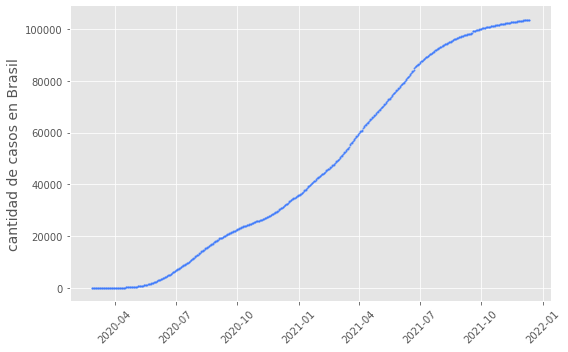

In [ ]:
# Seleccionamos los datos de Brasil
# =============================================================================
datos_BRA = datos[datos['Entity'] == 'Brazil'].sort_values('Day',ascending=True)
casos_BRA = datos_BRA.iloc[:,5]
dias_BRA = np.arange(0,len(casos_BRA))
fechas_BRA = datos_BRA.iloc[:,2]
mortalidad_BRA = datos_BRA.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_BRA,casos_BRA, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Brasil', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

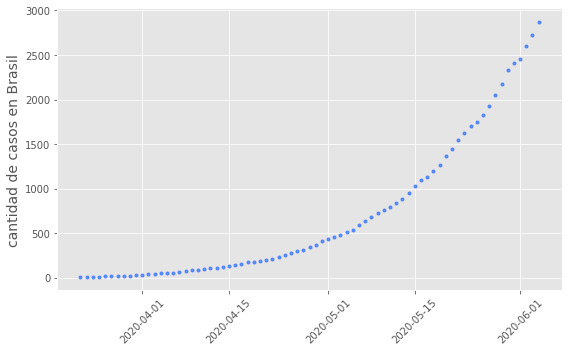

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_BRA_pico = fechas_BRA[25:100]
casos_BRA_pico = casos_BRA[25:100]
dias_BRA_pico = dias_BRA[25:100]

plt.plot_date(fechas_BRA_pico,casos_BRA_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Brasil', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Brasil, nuestro intervalo de días es bastante extenso del día 25 al 100; podría suponerse que es por la falta de restricciones en la circulación de personas que hace que el contagio siga incrementándose.

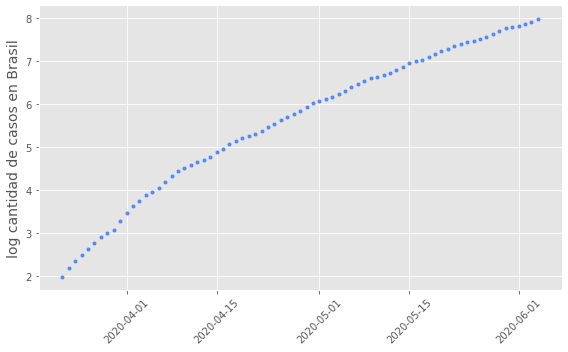

In [ ]:
# Graficamos usando logaritmo para la cantidad de casos
# =============================================================================
plt.plot_date(fechas_BRA_pico,np.log(casos_BRA_pico), alpha=0.8, markersize=3,
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Brasil', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_BRA_pico, casos_BRA_pico)
popt

array([  0.0559626 , -44.02950826])

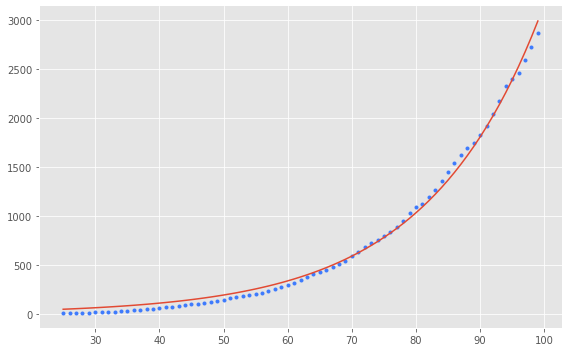

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_BRA_pico,k,t0)
plt.plot(dias_BRA_pico,casos_BRA_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_BRA_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Obtenemos un ajuste muy bueno para Brasil obteniendo un k de 0.0559626

In [ ]:
# Guardamos los resultados
# =============================================================================
Brasil = {'Paises':'Brazil',
          'Valor k':k,
          'Total días':dias_BRA_pico[-1] - dias_BRA_pico[0],
          'Mortalidad':mortalidad_BRA.iloc[100],
          'Porcentaje Poblacion':casos_BRA_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Brasil, ignore_index=True)

####Suecia

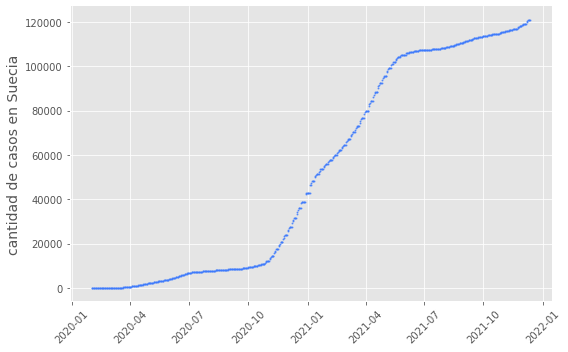

In [ ]:
# Seleccionamos los datos de Suecia
# =============================================================================
datos_SWE = datos[datos['Entity'] == 'Sweden'].sort_values('Day',ascending=True)
casos_SWE = datos_SWE.iloc[:,5]
dias_SWE = np.arange(0,len(casos_SWE))
fechas_SWE = datos_SWE.iloc[:,2]
mortalidad_SWE = datos_SWE.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_SWE,casos_SWE, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Suecia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

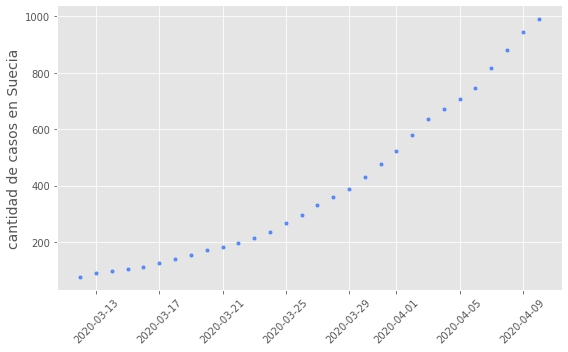

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_SWE_pico = fechas_SWE[40:70]
casos_SWE_pico = casos_SWE[40:70]
dias_SWE_pico = dias_SWE[40:70]

plt.plot_date(fechas_SWE_pico,casos_SWE_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')

plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Suecia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Para el caso de Suecia obtenemos un intervalo de días entre el día 40 y 70. El resto de días se comporta de manera muy lineal en el crecimiento de la curva de contagio.

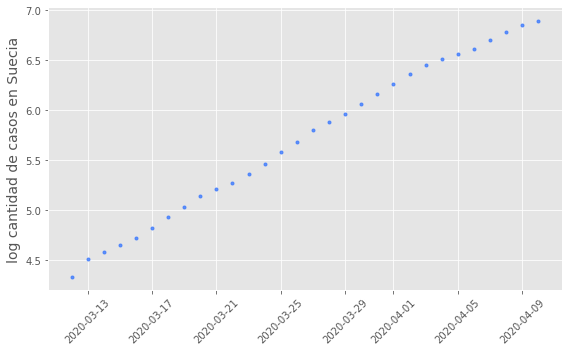

In [ ]:
# Graficamos usando logaritmo
# =============================================================================
plt.plot_date(fechas_SWE_pico,np.log(casos_SWE_pico), alpha=0.8, markersize=3,
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Suecia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_SWE_pico, casos_SWE_pico)
popt

array([  0.0828366, -14.9073866])

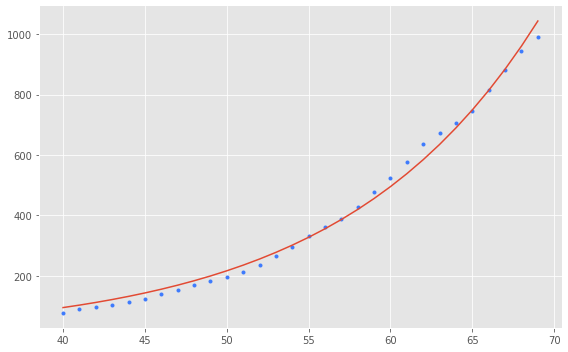

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_SWE_pico,k,t0)
plt.plot(dias_SWE_pico,casos_SWE_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_SWE_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Guardamos los resultados
# =============================================================================
Suecia = {'Paises':'Sweden',
          'Valor k':k,
          'Total días':dias_SWE_pico[-1] - dias_SWE_pico[0],
          'Mortalidad':mortalidad_SWE.iloc[70],
          'Porcentaje Poblacion':casos_SWE_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Suecia, ignore_index=True)

####Finlandia

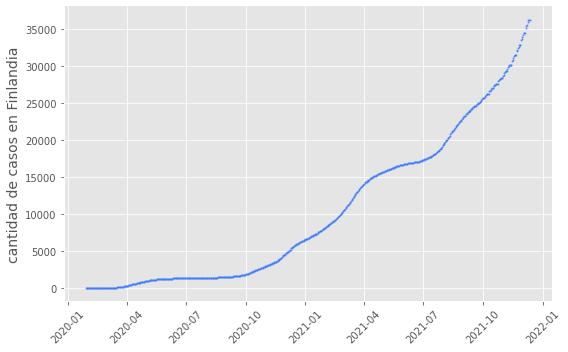

In [ ]:
# Seleccionamos los datos de Finlandia
# =============================================================================
datos_FIN = datos[datos['Entity'] == 'Finland'].sort_values('Day',
                                                            ascending=True)
casos_FIN = datos_FIN.iloc[:,5]
dias_FIN = np.arange(0,len(casos_FIN))
fechas_FIN = datos_FIN.iloc[:,2]
mortalidad_FIN = datos_FIN.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_FIN,casos_FIN, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Finlandia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

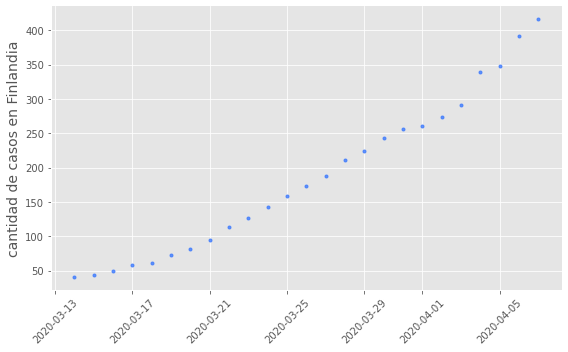

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_FIN_pico = fechas_FIN[45:70]
casos_FIN_pico = casos_FIN[45:70]
dias_FIN_pico = dias_FIN[45:70]

plt.plot_date(fechas_FIN_pico,casos_FIN_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Finlandia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

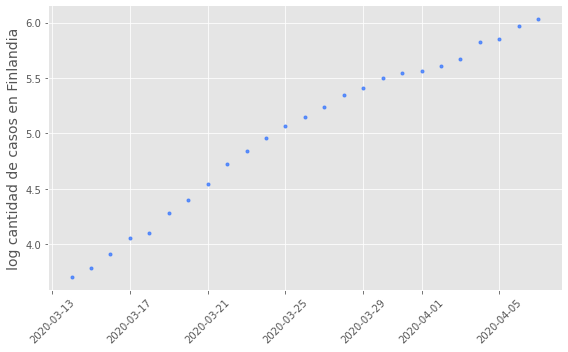

In [ ]:
# Graficamos usando el logaritmo
# =============================================================================
plt.plot_date(fechas_FIN_pico,np.log(casos_FIN_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Finlandia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

los días elegidos para el primer pico en Finlandia son entre el día 45 y 70, días anteriores muestran un crecimiento irregular que no favorecen el análisis.

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_FIN_pico, casos_FIN_pico)
popt

array([ 0.08275115, -4.19245764])

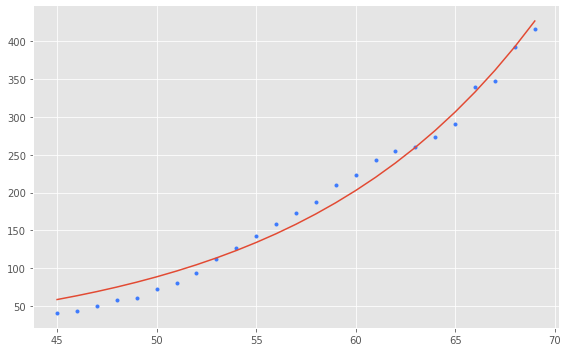

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_FIN_pico,k,t0)
plt.plot(dias_FIN_pico,casos_FIN_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_FIN_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Guardamos los resultados
# =============================================================================
Finlandia = {'Paises':'Finland',
          'Valor k':k,
          'Total días':dias_FIN_pico[-1] - dias_FIN_pico[0],
          'Mortalidad':mortalidad_FIN.iloc[70],
          'Porcentaje Poblacion':casos_FIN_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Finlandia, ignore_index=True)

####Ucrania

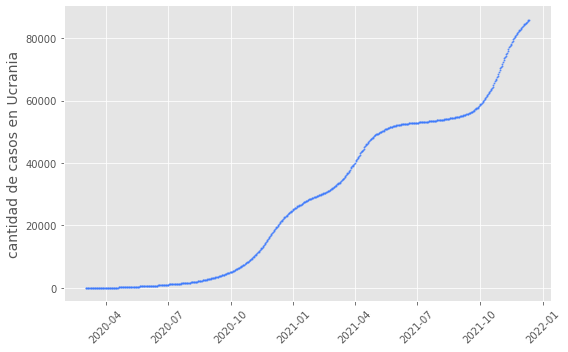

In [ ]:
# Seleccionamos los datos de Ucrania
# =============================================================================
datos_UKR = datos[datos['Entity'] == 'Ukraine'].sort_values('Day',
                                                            ascending=True)
casos_UKR = datos_UKR.iloc[:,5]
dias_UKR = np.arange(0,len(casos_UKR))
fechas_UKR = datos_UKR.iloc[:,2]
mortalidad_UKR = datos_UKR.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_UKR,casos_UKR, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')

plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Ucrania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

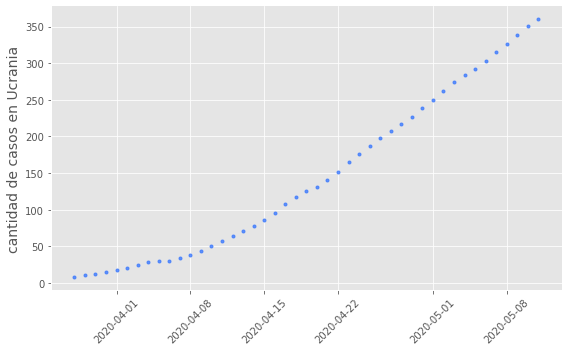

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_UKR_pico = fechas_UKR[25:70]
casos_UKR_pico = casos_UKR[25:70]
dias_UKR_pico = dias_UKR[25:70]

plt.plot_date(fechas_UKR_pico,casos_UKR_pico, alpha=0.8, markersize=3,
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Ucrania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Ucrania tomamos el intervalo de tiempo entre el día 25 y 70, obteniendo el crecimiento sostenido de la gráfica. Sin embargo, es más lineal que exponencial su crecimiento.

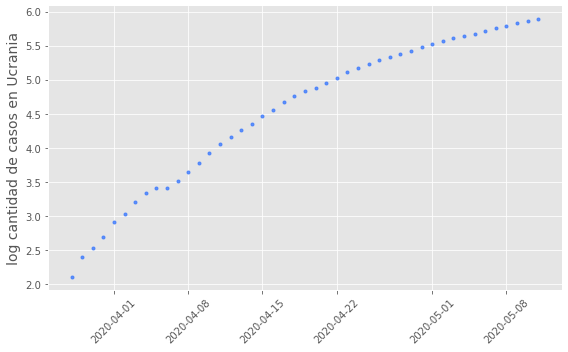

In [ ]:
# Graficamos usando el logaritmo
# =============================================================================
plt.plot_date(fechas_UKR_pico,np.log(casos_UKR_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Ucrania', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_UKR_pico, casos_UKR_pico)
popt

array([  0.05628263, -37.48005133])

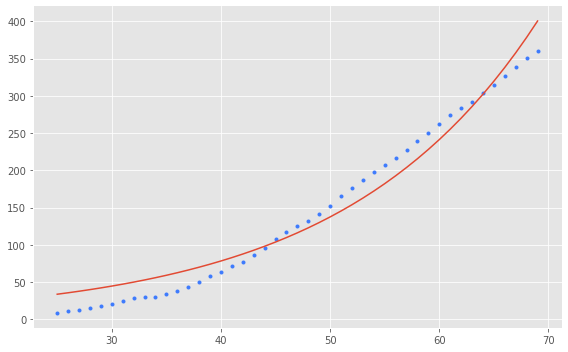

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_UKR_pico,k,t0)
plt.plot(dias_UKR_pico,casos_UKR_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_UKR_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Debido a que el crecimiento de los contagios para Ucrania es bastante lineal, el ajuste que obtenemos no es el mejor. Aún así, guardamos los datos resultantes.

In [ ]:
# Guardamos los resultados
# =============================================================================
Ucrania = {'Paises':'Ukraine',
          'Valor k':k,
          'Total días':dias_UKR_pico[-1] - dias_UKR_pico[0],
          'Mortalidad':mortalidad_UKR.iloc[70],
          'Porcentaje Poblacion':casos_UKR_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Ucrania, ignore_index=True)

####Bielorrusia

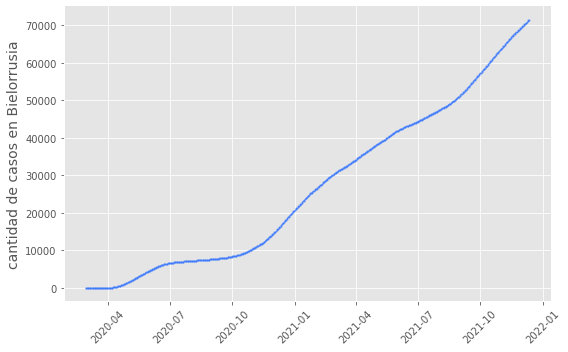

In [ ]:
# Seleccionamos los datos de Bielorrusia
# =============================================================================
datos_BLR = datos[datos['Entity'] == 'Belarus'].sort_values('Day',
                                                            ascending=True)
casos_BLR = datos_BLR.iloc[:,5]
dias_BLR = np.arange(0,len(casos_BLR))
fechas_BLR = datos_BLR.iloc[:,2]
mortalidad_BLR = datos_BLR.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_BLR,casos_BLR, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Bielorrusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

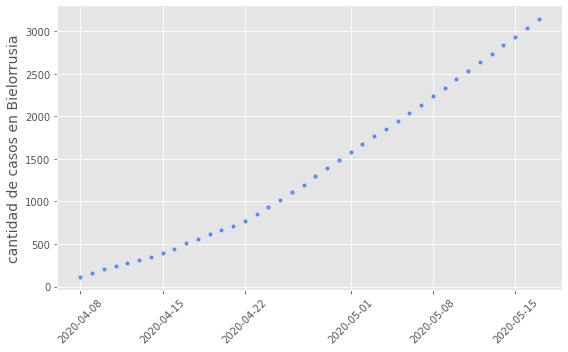

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_BLR_pico = fechas_BLR[40:80]
casos_BLR_pico = casos_BLR[40:80]
dias_BLR_pico = dias_BLR[40:80]

plt.plot_date(fechas_BLR_pico,casos_BLR_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')

plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Bielorrusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

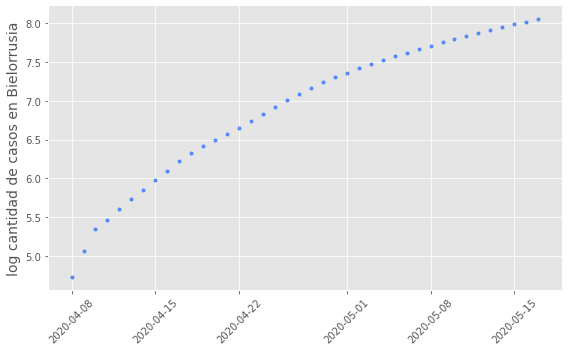

In [ ]:
# Graficamos usando el logaritmo
# =============================================================================
plt.plot_date(fechas_BLR_pico,np.log(casos_BLR_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Bielorrusia', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En el caso de Bielorrusia tomamos como intervalo entre los días 40 y 80 analizando las curvas de las gráficas anteriormente realizadas

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_BLR_pico, casos_BLR_pico)
popt

array([ 5.61346111e-02, -6.61044329e+01])

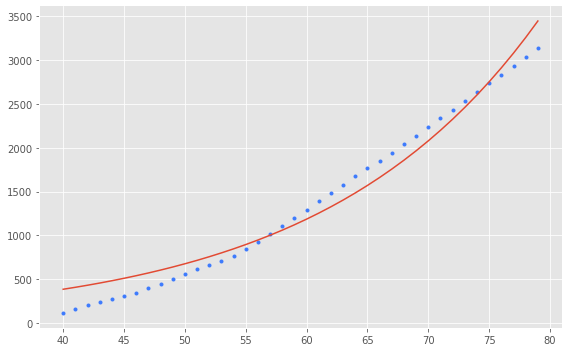

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_BLR_pico,k,t0)
plt.plot(dias_BLR_pico,casos_BLR_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_BLR_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Como su crecimiento tampoco al igual que Ucrania no fue exponencial, el ajuste no es tan bueno teniendo en cuenta la gráfica obtenida.

In [ ]:
# Guardamos los resultados
# =============================================================================
Bielorrusia = {'Paises':'Belarus',
          'Valor k':k,
          'Total días':dias_BLR_pico[-1] - dias_BLR_pico[0],
          'Mortalidad':mortalidad_BLR.iloc[80],
          'Porcentaje Poblacion':casos_BLR_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Bielorrusia, ignore_index=True)

####Irán

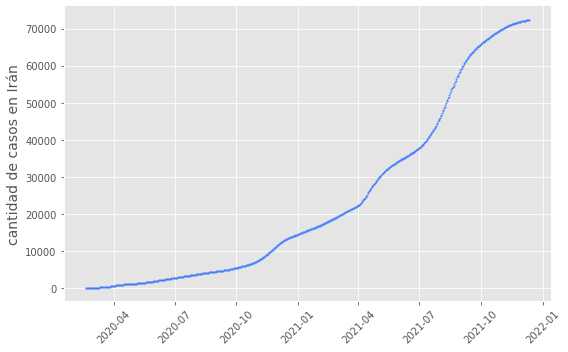

In [ ]:
# Seleccionamos los datos de Irán
# =============================================================================
datos_IRN = datos[datos['Entity'] == 'Iran'].sort_values('Day',ascending=True)
casos_IRN = datos_IRN.iloc[:,5]
dias_IRN = np.arange(0,len(casos_IRN))
fechas_IRN = datos_IRN.iloc[:,2]
mortalidad_IRN = datos_IRN.iloc[:,6]

# Graficamos todas las fechas
# =============================================================================
plt.plot_date(fechas_IRN,casos_IRN, alpha=0.7, markersize=1, 
              color='xkcd:lightish blue')
plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Irán', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

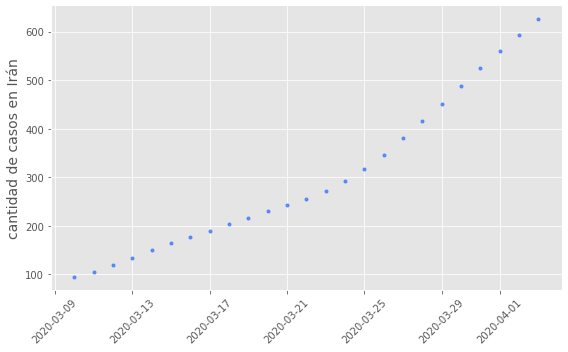

In [ ]:
# Graficamos el primer pico de acuerdo a la gráfica general
# =============================================================================
fechas_IRN_pico = fechas_IRN[20:45]
casos_IRN_pico = casos_IRN[20:45]
dias_IRN_pico = dias_IRN[20:45]

plt.plot_date(fechas_IRN_pico,casos_IRN_pico, alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')

plt.xticks(rotation=45)
plt.ylabel('cantidad de casos en Irán', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

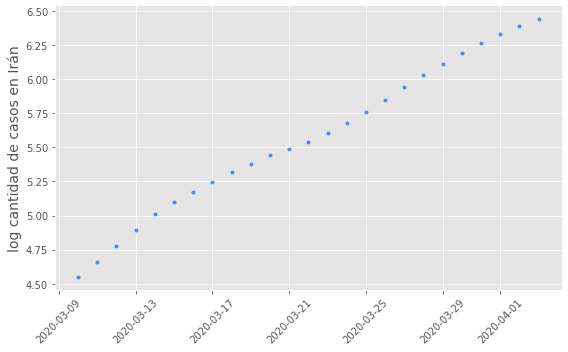

In [ ]:
# Graficamos usando logaritmo
# =============================================================================
plt.plot_date(fechas_IRN_pico,np.log(casos_IRN_pico), alpha=0.8, markersize=3, 
              c='xkcd:lightish blue')

plt.xticks(rotation=45)
plt.ylabel('log cantidad de casos en Irán', fontsize=14)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

En este caso las fechas seleccionadas fueron entre el día 20 y 45, que mantuvieron su crecimiento y en el logaritmo se comporta casi lineal.

In [ ]:
# Ajustamos a la función exponencial
# =============================================================================
popt, pcov = curve_fit(exponencial, dias_IRN_pico, casos_IRN_pico)
popt

array([  0.07446971, -42.79861028])

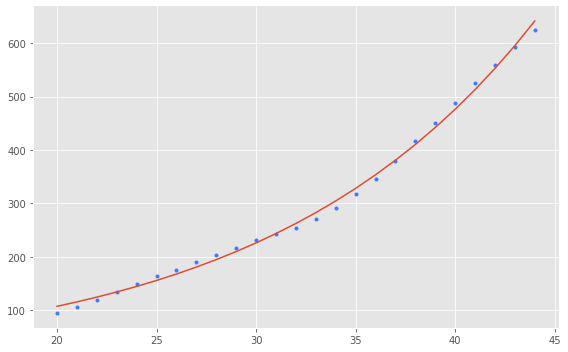

In [ ]:
# Graficamos para ver el ajuste con datos reales
# =============================================================================
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_IRN_pico,k,t0)
plt.plot(dias_IRN_pico,casos_IRN_pico,'.',c='xkcd:lightish blue')
plt.plot(dias_IRN_pico,casos_simu)
plt.gcf().set_size_inches(8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Guardamos los resultados
# =============================================================================
Iran = {'Paises':'Iran',
          'Valor k':k,
          'Total días':dias_IRN_pico[-1] - dias_IRN_pico[0],
          'Mortalidad':mortalidad_IRN.iloc[45],
          'Porcentaje Poblacion':casos_IRN_pico.iloc[-1]/10000,
          'Confinamiento':0}

# Añadiendo una fila al dataframe
# =============================================================================
df_paises = df_paises.append(Iran, ignore_index=True)

In [ ]:
# Consultamos los resultados obtenidos luego del ejercicio
# =============================================================================
df_paises

,Paises,Valor k,Total días,Mortalidad,Porcentaje Poblacion,Confinamiento
0,United Kingdom,0.104881,34,158.766,0.120652,1
1,Italy,0.100634,34,205.872,0.168533,1
2,South Korea,0.183985,14,0.819,0.011866,1
3,Germany,0.159680,26,6.353,0.068766,1
4,France,0.133997,32,70.733,0.077380,1
5,Spain,0.141460,24,200.812,0.205204,1
6,Japan,0.084936,31,1.872,0.007900,0
7,Russia,0.081808,44,13.124,0.136161,1
8,Brazil,0.055963,74,163.678,0.287364,0
9,Sweden,0.082837,29,87.302,0.098945,0


#### Clasificador usando el indicador k

Se inicia el análisis de los indicadores con un modelo de regresión logística que clasifique a partir de los valores *k* de los países

In [ ]:
# Extraemos los datos para el clasificador
# =============================================================================
valores_k = np.array(df_paises['Valor k']).reshape(-1,1)
confinamiento = np.array(df_paises['Confinamiento']).reshape(-1,1)
datos_k  = df_paises[['Valor k', 'Confinamiento']].copy()
datos_k

,Valor k,Confinamiento
0,0.104881,1
1,0.100634,1
2,0.183985,1
3,0.159680,1
4,0.133997,1
5,0.141460,1
6,0.084936,0
7,0.081808,1
8,0.055963,0
9,0.082837,0


In [ ]:
confinamiento.shape

(14, 1)

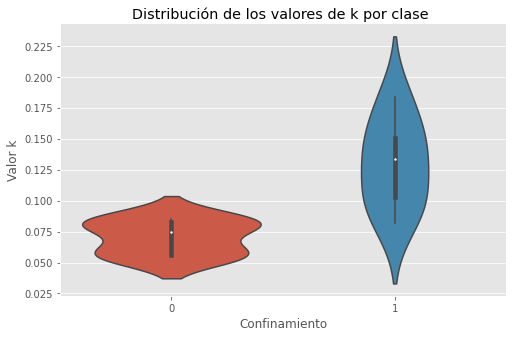

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.violinplot(
        x     = 'Confinamiento',
        y     = 'Valor k',
        data  = datos_k,
        ax    = ax
    )

ax.set_title('Distribución de los valores de k por clase ');

In [ ]:
# T-test entre clases
# =============================================================================
res_ttest = ttest_ind(
                x1 = valores_k[confinamiento == 0],
                x2 = valores_k[confinamiento == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-4.053123547609923, p-value=0.0016013322462191137


Luego de realizar el gráfico de violín y la prueba T para los datos de este clasificador, se evidencia que existe una diferencia entre el valor *k* con confinamiento y sin confinamiento. Así es como podemos considerar que el valor k podría ser un buen predictor para el modelo de clasificación.

In [ ]:
# División de los datos en train y test
# =============================================================================
X = valores_k
y = confinamiento
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
                                                                stratify=y,
                                                                test_size=0.28,
                                                                random_state=seed)
X.shape

(14, 1)

Vamos a dividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo. De esta manera evitar el overfitting.

Se usarán entonces los datos de entrada en forma aleatoria utilizando 72% de registros para entrenamiento y 28% para validar. De esta manera, diez registros serán utilizados para entrenar y 4 para la validación.

In [ ]:
# Implementación del modelo de regresión logística y reporte de resultados
# =============================================================================
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_validation)
report = classification_report(Y_validation, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
# Imprimimos la matriz de confusión
# =============================================================================
matrix = confusion_matrix(Y_validation, predicted)
print(matrix)

[[1 1]
 [0 2]]


Teniendo en cuenta que el modelo es capaz de clasificar correctamente el 75% de las observaciones del conjunto de validación usando el valor *k*, diríamos que es un clasificador del modelo que funciona bien. 

En otras palabras, se puede concluir entonces que el clasificador usando únicamente el valor de *k* podría predecir bien si un territorio ha tenido la política de confinamiento o no.


#### Clasificador usando la mortalidad

In [ ]:
# Extraemos los datos para el clasificador
# =============================================================================
mortalidad = np.array(df_paises['Mortalidad'])
confinamiento = np.array(df_paises['Confinamiento'])
datos_m  = df_paises[['Mortalidad', 'Confinamiento']].copy()
datos_m

,Mortalidad,Confinamiento
0,158.766,1
1,205.872,1
2,0.819,1
3,6.353,1
4,70.733,1
5,200.812,1
6,1.872,0
7,13.124,1
8,163.678,0
9,87.302,0


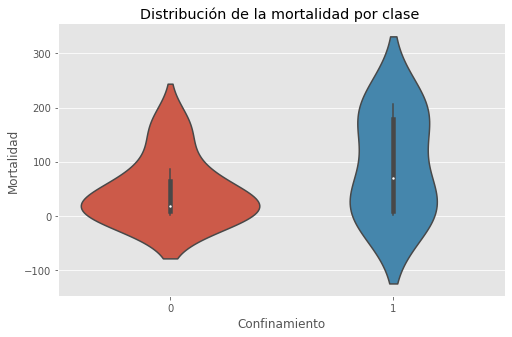

In [ ]:
# Gráfico para ver la distribución de la mortalidad en cada clase de confinamiento
# =============================================================================
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.violinplot(
        x     = 'Confinamiento',
        y     = 'Mortalidad',
        data  = datos_m,
        ax    = ax
    )

ax.set_title('Distribución de la mortalidad por clase ');

In [ ]:
# T-test entre clases
# =============================================================================
res_ttest = ttest_ind(
                x1 = mortalidad[confinamiento == 0],
                x2 = mortalidad[confinamiento == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-1.1261365849494156, p-value=0.2821254215502271


Luego de realizar el gráfico de violín y la prueba T para los datos de este clasificador. No hay un diferencial claro con los datos de mortalidad y su relación con la política de confinamiento. 

También se observa un valor de p en este caso mayor que nuestro umbral de 5% indicando que no existe una diferencia significativa entre las instancias con confinamiento y sin confinamiento, aceptando la hipotesis nula de ser muestras con una media similar. Esta dependencia ya nos indica que el clasificador usando la variable de mortalidad podría no ser muy bueno para predecir la política pública.

In [ ]:
# División de los datos en train y test
# =============================================================================
X = mortalidad.reshape(-1, 1)
y = confinamiento.reshape(-1, 1)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
                                                                stratify=y,
                                                                test_size=0.28,
                                                                random_state=seed)
X.shape

(14, 1)

Dividimos nuestro conjunto de datos nuevamente para este clasificador y se usarán los mismos números de muestras para el entrenamiento y la validación.

In [ ]:
# Implementación del modelo de regresión logística y reporte de resultados
# =============================================================================
model_m = LogisticRegression(solver = 'liblinear')
model_m.fit(X_train, Y_train)
predicted = model_m.predict(X_validation)
report = classification_report(Y_validation, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
# Examinamos la matriz de confusión para validar las predicciones
# =============================================================================
matrix = confusion_matrix(Y_validation, predicted)
print(matrix)

[[2 0]
 [1 1]]


A pesar de que en la prueba T no se obtuvo muy buenos resultados y conduce a que no existe una diferencia significativa entre ambos conjuntos de datos (confinamiento y no confinamiento). El modelo usando las instancias de entrenamiento es capaz de clasificar correctamente el 75% de las observaciones del conjunto de validación usando la variable mortalidad.


#### Clasificador usando el indicador de población contagiada

In [ ]:
# Extraemos los datos para el clasificador
# =============================================================================
poblacion = np.array(df_paises['Porcentaje Poblacion'])
confinamiento = np.array(df_paises['Confinamiento'])
datos_m  = df_paises[['Porcentaje Poblacion', 'Confinamiento']].copy()
datos_m

,Porcentaje Poblacion,Confinamiento
0,0.120652,1
1,0.168533,1
2,0.011866,1
3,0.068766,1
4,0.077380,1
5,0.205204,1
6,0.007900,0
7,0.136161,1
8,0.287364,0
9,0.098945,0


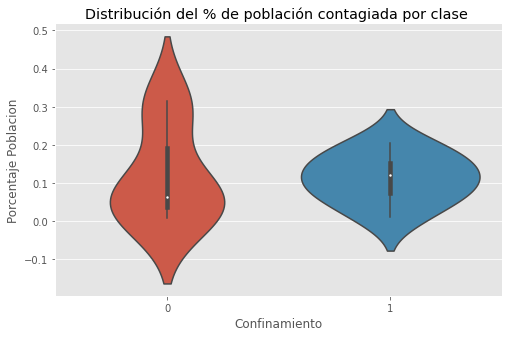

In [ ]:
# Gráfico para ver la distribución de la población contagiada en cada clase
# =============================================================================
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.violinplot(
        x     = 'Confinamiento',
        y     = 'Porcentaje Poblacion',
        data  = datos_m,
        ax    = ax
    )

ax.set_title('Distribución del % de población contagiada por clase ');

In [ ]:
# T-test entre clases
# =============================================================================
res_ttest = ttest_ind(
                x1 = poblacion[confinamiento == 0],
                x2 = poblacion[confinamiento == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=0.15926872431157924, p-value=0.8761063795161436


Luego de realizar el gráfico de violín y la prueba T para los datos de este clasificador (porcentaje de la población contagiada). No hay un diferencia significativa entre los datos del porcentaje de la población que fue contagiada y la política de confinamiento.

También se observa un valor de p en este caso mayor que nuestro umbral de 5% indicando nuevamente que aceptamos la hipotesis nula de ser muestras con una media similar y que no existe una diferencia significativa como en el indicador anterior de mortalidad. Esta dependencia ya nos indica que el clasificador usando esta variable no sería muy bueno para predecir la política pública.

In [ ]:
# División de los datos en train y test
# =============================================================================
X = poblacion.reshape(-1, 1)
y = confinamiento.reshape(-1, 1)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
                                                                stratify=y,
                                                                test_size=0.28,
                                                                random_state=seed)
X.shape

(14, 1)

Dividimos nuestro conjunto de datos nuevamente para este clasificador y se usarán los mismos números de muestras para el entrenamiento y la validación.

In [ ]:
# Implementación del modelo de regresión logística y reporte de resultados
# =============================================================================
model_p = LogisticRegression(solver = 'liblinear')
model_p.fit(X_train, Y_train)
predicted = model_p.predict(X_validation)
report = classification_report(Y_validation, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



In [ ]:
# Examinamos la matriz de confusión para validar las predicciones
# =============================================================================
matrix = confusion_matrix(Y_validation, predicted)
print(matrix)

[[0 2]
 [2 0]]


Para este clasificar no obtenemos buenos resultados cuando usamos la variable de porcentaje de la población que ha sido contagiada para evaluar la política de confinamiento de los países. Esto considerando que este modelo no fue capaz de clasificar adecuadamente ningún país del conjunto de validación. Incluso una predicción de 50/50 sería más acertada que este clasificador.

#### Comentarios sobre los clasificadores



Para el ejercicio se seleccionaron los indicadores de valor *k*, mortalidad y porcentaje de la población que se contagio para 14 países del mundo, 7 que aplicaron la política de confinamiento y 7 que no. 

Creando modelos de clasificación usando la regresión logística obtuvimos que los mejores clasificadores fueron los valores de *k*, que habla de la curva de contagio que tiene determinado país y la mortalidad, número de muertos por millón al alcanzar el primer pico, con un accuracy de 75% para el conjunto de validación. 

Para ambos clasificadores estudiamos la distribución de las variables en el conjunto completo de datos e hicimos una prueba t para probar que las muestras eran diferentes significativamente y no tenían valores promedio similares, en el caso de los valores *k* se pudo comprobar esto con mayor claridad. 

Algunas de las razones por las que probablemente estos clasificadores funcionaron muy bien es que la política de confinamiento precisamente buscaba frenar estos dos fenómenos, la contagiosidad y la mortalidad, al restringuir la circulación de las personas uno espera que existan menos contagiados y a la vez existan menos muertes causadas por la pandemia. Sin embargo, sigue existiendo una gran porcentaje de clasificación (25%) que todavía es posible mejorar incorporando otras variables o extendiendo el análisis más allá del primer pico.

El clasificador que no funcionó muy bien fue el de la población contagiada, esto pudo deberse a que seguramente el porcentaje de población contagiada tenía una distribución en ambas condiciones (confinamiento o no) con medias muy similares, tal como se vio también haciendo la prueba t, y esto hace que la clasificación sea más dificil de lograr usando solamente este indicador al no encontrar una diferencia significativa entre ambas muestras. 

También podríamos decir que el porcentaje de la población que se contagia depende también del tamaño de los países; en países muy grandes la decisión de confinamiento no debería tomarse basado en el porcentaje de la población contagiada porque aparentemente puede ser un porcentaje pequeño pero en términos absolutos puede ser una población muy grande o una región del país con mucho riesgo.



## Investigación

### Cuestiones propuestas a desarrollar

En el ejercicio presente, el análisis de los indicadores se hizo únicamente para el período de tiempo que antecedía al primer pico de contagio. Es decir, que la medición de variables se hizo hasta que se alcanzó ese primer pico. Sin embargo, las medidas y políticas públicas implementadas en muchos países resultaron un tiempo después de este pico, por muchas razones, entre ellas que las pruebas no estaban disponibles de manera masiva para todo el mundo, los equipos médicos tampoco estaban listos y los reportes no estaban estandarizados para hacer análisis comparativos de la pandemia.

Por lo anterior, se podría profundizar posteriormente teniendo en consideración el análisis de múltiples picos para los diferentes países y cómo esto afecta tanto la política de confinamiento como los indicadores de evaluación, como también poder medir la efectividad de las políticas en tiempos posteriores a los del primer pico. Por otro lado, se podría verificar si es posible predecir la curva de contagio o la mortalidad, a través del análisis de series de tiempo con el fin de tomar medidas preventivas y que pueda ayudar a tomar decisiones en política pública a los gobernantes.

### Conclusiones generales del proyecto

El presente proyecto comienza con el análisis de los valores *k* para diferentes países del hemisferio norte, obteniendo resultados muy buenos ajustando la curva de contagio a partir del valor *k*. En esta primera fase, pocos países tuvieron una curva de contagio que no se comportaba de manera tan exponencial en ciertos tramos, pero no impidió hacer el ejercicio propuesto.

Posteriormente, cuando analizamos el valor *k* de la población mundial usando los valores *k* de los países seleccionados, nos dimos cuenta de que nuestra selección estuvo muy bien realizada cuando seleccionamos países que tuvieron los recursos adecuados para hacer las mediciones periódicas, los equipos técnicos y reportaban adecuadamente los casos de contagio y de mortalidad. También encontramos que, para realizar una comparación entre el valor *k* estimado y el valor real de la población mundial, era necesario suprimir a China de la medición, ya que los datos que fueron suministrados por ese gobierno se comportaban de manera atípica y podían contaminar las mediciones del resto de los países.

Por otro lado, cuando seleccionamos 14 países para evaluar los clasificadores, encontramos que muchos de los gobiernos no habían implementado confinamiento porque tenían un nivel de contagiosidad muy bajo, mientras que aquellos países donde el valor *k* era muy cerca a 0.1 en la mayoría de los casos fueron países donde si se tuvo que implementar la política pública. Esto fue validado también por el clasificador que obtuvo una exactitud (accuracy) de 75% para el conjunto de datos de validación. Es decir, que es muy probable que los gobiernos tomaran la decisión de no implementar el confinamiento porque tenían precisamente una curva de contagio no muy inclinada.

Por último y dado los resultados obtenidos, el proyecto se desarrolló satisfactoriamente encontrando modelos de clasificación que podían caracterizar adecuadamente la implementación de la política pública de confinamiento a partir de los valores *k* y de la mortalidad. Sin embargo, también es evidente que es una primera aproximación a un análisis mucho más extenso que podría considerar el análisis de varios picos en diferentes tiempos de la pandemia y que también como se dijo anteriormente, sería muy útil tratar de predecir la curva de contagio a partir del análisis de series de tiempo. Todo esto demostrando ser una herramienta muy útil para la toma de decisiones por parte de implementadores de políticas públicas y para evaluar también su éxito.   

### Referencias

Regresión Logística con Python. https://CienciaDeDatos.net. Recuperado de: [Enlace](https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html) (2022-03-03)

COVID-19: Stay-at-Home Restrictions. https://OurWorldInData.org. Recuperado de: [Enlace](https://ourworldindata.org/covid-stay-home-restrictions) (2022-03-03)

Covid and data science: Understanding R0 could change your life. https://onlinelibrary.wiley.com. Recuperado de: [Enlace](https://onlinelibrary.wiley.com/doi/10.1111/test.12273) (2022-04-05)

Illustration with Python: Confidence Interval. https://towardsdatascience.com. Recuperado de: [Enlace](https://towardsdatascience.com/illustration-with-python-confidence-interval-ee4736cc3dc2) (2022-04-05)

¿Cómo medir la efectividad de las cuarentenas?. https://www.eltiempo.com. Recuperado de: [Enlace](https://www.eltiempo.com/bogota/opinion-561468) (2022-05-05)
